## Output Interactivity Setting

In [ ]:
a=[1,2,3,4]
b=[2,3,4,5]
a
b

[2, 3, 4, 5]

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
a
print()
b

[1, 2, 3, 4]

[2, 3, 4, 5]

## Variable Inspector

This notebook demonstrates how one can use the widgets already built in to IPython to create a working variable inspector much like the ones seen in popular commercial scientific computing environments.

In [ ]:
import ipywidgets as widgets # Loads the Widget framework.
from IPython.core.magics.namespace import NamespaceMagics # Used to query namespace.

# For this example, hide these names, just to avoid polluting the namespace further
get_ipython().user_ns_hidden['widgets'] = widgets
get_ipython().user_ns_hidden['NamespaceMagics'] = NamespaceMagics

class VariableInspectorWindow(object):
    instance = None
    
    def __init__(self, ipython):
        """Public constructor."""
        if VariableInspectorWindow.instance is not None:
            raise Exception("""Only one instance of the Variable Inspector can exist at a 
                time.  Call close() on the active instance before creating a new instance.
                If you have lost the handle to the active instance, you can re-obtain it
                via `VariableInspectorWindow.instance`.""")
        
        VariableInspectorWindow.instance = self
        self.closed = False
        self.namespace = NamespaceMagics()
        self.namespace.shell = ipython.kernel.shell
        
        self._box = widgets.Box()
        self._box.layout.overflow_y = 'scroll'
        self._table = widgets.HTML(value = 'Not hooked')
        self._box.children = [self._table]
        
        self._ipython = ipython
        self._ipython.events.register('post_run_cell', self._fill)
        
    def close(self):
        """Close and remove hooks."""
        if not self.closed:
            self._ipython.events.unregister('post_run_cell', self._fill)
            self._box.close()
            self.closed = True
            VariableInspectorWindow.instance = None

    def _fill(self):
        """Fill self with variable information."""
        values = self.namespace.who_ls()
        self._table.value = '<div class="rendered_html jp-RenderedHTMLCommon"><table><thead><tr><th>Name</th><th>Type</th><th>Value</th></tr></thead><tr><td>' + \
            '</td></tr><tr><td>'.join(['{0}</td><td>{1}</td><td>{2}'.format(v, type(eval(v)).__name__, str(eval(v))) for v in values]) + \
            '</td></tr></table></div>'

    def _ipython_display_(self):
        """Called when display() or pyout is used to display the Variable 
        Inspector."""
        self._box._ipython_display_()

Test

In [ ]:
a = 5
b = 3.0
c = a * b
d = "String"

In [ ]:
if 'inspector' in locals(): inspector.close()
inspector = VariableInspectorWindow(get_ipython())
inspector

Box(children=(HTML(value='Not hooked'),), layout=Layout(overflow_y='scroll'))

In [ ]:
del b
if 'inspector' in locals(): inspector.close()
inspector = VariableInspectorWindow(get_ipython())
inspector

Box(children=(HTML(value='Not hooked'),), layout=Layout(overflow_y='scroll'))

## Magic Command
- pwd : 현 주피터 노트북 파일의 경로
- ls : 현 폴더(Directory)의 파일 리스트 
- whos : 현 파일에서 메모리에 할당된 변수 리스트 
- reset : 현 파일에서 메모리에 할당된 변수 리스트를 모두 삭제 

In [ ]:
%ls ../usr/src -all

total 444
drwxr-xr-x  1 root root   4096 Apr  7 13:29 ./
drwxr-xr-x  1 root root   4096 Apr  7 13:30 ../
-rw-r--r--  1 root root  64667 Aug  9  2019 fortran.c
-rw-r--r--  1 root root  17859 Aug  9  2019 fortran_common.h
-rw-r--r--  1 root root  39040 Aug  9  2019 fortran.h
-rw-r--r--  1 root root 269462 Aug  9  2019 fortran_thunking.c
-rw-r--r--  1 root root  34362 Aug  9  2019 fortran_thunking.h
drwxr-xr-x 25 root root   4096 Apr  7 13:29 linux-headers-4.15.0-140/
drwxr-xr-x  8 root root   4096 Apr  7 13:29 linux-headers-4.15.0-140-generic/
drwxr-xr-x  8 root root   4096 Apr  7 13:24 nvidia-460.67/


In [ ]:
%dir

UsageError: Line magic function `%dir` not found.


## Shell Command
- jupyter notebook에서 설정된 쉘 환경의 명령어 실행
- !를 명령어 앞에 붙임
- 윈도우 기본 쉘(CLI,command-line interface)
- 리눅스 기본 쉘(Bash Sheel)

In [ ]:
!ls ../usr/src -all

total 444
drwxr-xr-x  1 root root   4096 Apr  7 13:29 .
drwxr-xr-x  1 root root   4096 Apr  7 13:30 ..
-rw-r--r--  1 root root  64667 Aug  9  2019 fortran.c
-rw-r--r--  1 root root  17859 Aug  9  2019 fortran_common.h
-rw-r--r--  1 root root  39040 Aug  9  2019 fortran.h
-rw-r--r--  1 root root 269462 Aug  9  2019 fortran_thunking.c
-rw-r--r--  1 root root  34362 Aug  9  2019 fortran_thunking.h
drwxr-xr-x 25 root root   4096 Apr  7 13:29 linux-headers-4.15.0-140
drwxr-xr-x  8 root root   4096 Apr  7 13:29 linux-headers-4.15.0-140-generic
drwxr-xr-x  8 root root   4096 Apr  7 13:24 nvidia-460.67


In [ ]:
!dir

gdrive	sample_data


## Plot with Korean

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,674 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 145483 files and d

런타임 - 런타임 다시 시작

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

Text(0.5, 0, '시간(분)')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


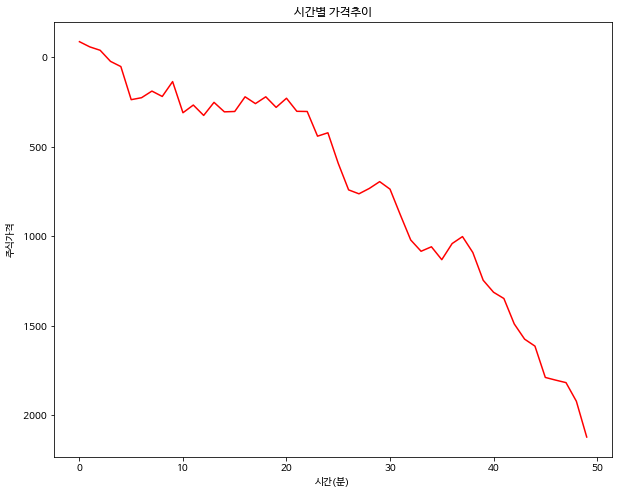

In [ ]:
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data
plt.figure(figsize=(10,8))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

## Numbers

In [1]:
a = 123
a = -178
a = 0
a = 1.2
a = -3.45

a = 4.24E10
print(a)

a = 4.24e-10
print(a)

a = 0o177 # 8진수
print(a)

a = 0xff # 16진수
print(a)

42400000000.0
4.24e-10
127
255


In [2]:
a=3; b=4;
print(a+b)
print(a*b)
print(a/b)
print(a**b) # a^b
print(7/4)
print(7//4)
print(7%4)
print(divmod(7,4))

7
12
0.75
81
1.75
1
3
(1, 3)


## String

In [ ]:
food = "Python's favorite food is perl"
say = '"Python is very easy." he says.'
print(food)
print(say)

food = 'Python\'s favorite food is perl'
say = "\"Python is very easy.\" he says."
print(food)
print(say)

multiline = "Life is too short\nYou need python"
print(multiline)

multiline='''
Life is too short
You need python
'''
print(multiline)

multiline="""
Life is too short
You need python
"""
print(multiline)


Python's favorite food is perl
"Python is very easy." he says.
Python's favorite food is perl
"Python is very easy." he says.
Life is too short
You need python

Life is too short
You need python


Life is too short
You need python



In [ ]:
head = "Python"
tail = " is fun!"
head + tail

'Python is fun!'

In [ ]:
a = "python"
a*2

'pythonpython'

In [ ]:
print("="*50)
print("My Program")
print("="*50)

My Program


In [ ]:
a="life is too short"
len(a)

17

In [ ]:
a = "Life is too short, You need Python"
print(a[3])
print(a[0])
print(a[12])
print(a[-1])
print(a[-2])
print(a[-5])
b = a[0] + a[1] + a[2] + a[3]
print(b)
print(a[0:3]) # 0:3 -> 0 <= a < 3
print(a[19:])
print(a[:17])
print(a[:])
print(a[19:-7])

e
L
s
n
o
y
Life
Lif
You need Python
Life is too short
Life is too short, You need Python
You need


In [ ]:
a = "Pithon"
a[1] = 'y'

TypeError: ignored

In [ ]:
a=a[:1] + 'y' + a[2:]
print(a)

Python


In [ ]:
number = 3
str_number = 'five'
print('I eat %d apple' % 3)
print('I eat %s apples.' % 'five')
print('I eat %d apple' % number)
print('I eat %s apples.' % str_number)
print("I ate %d apples. so I was sick for %s days." % (number, str_number))
# %c: character %s: string %d: integer %f: float %o: 8진수 %x: 16진수 %%: '%'
print('rate is %s' % 3.14) # automatically change float(3.14) to String('3.14')

I eat 3 apple
I eat five apples.
I eat 3 apple
I eat five apples.
I ate 3 apples. so I was sick for five days.
rate is 3.14


In [ ]:
print("%10s" % "hi")
print("%-10sjane." % 'hi')
print("%0.4f" % 3.42134234)
print("%10.4f" % 3.42134234)

        hi
hi        jane.
3.4213
    3.4213


In [ ]:
print("I eat {0} apples".format(3))
print("I eat {0} apples".format("five"))
number = 3
print("I eat {0} apples".format(number))
day = "three"
print("I ate {0} apples. so I was sick for {1} days.".format(number, day))
print("I ate {number} apples. so I was sick for {day} days.".format(number=10, day=3))
print("I ate {0} apples. so I was sick for {day} days.".format(10, day=3))

I eat 3 apples
I eat five apples
I eat 3 apples
I ate 3 apples. so I was sick for three days.
I ate 10 apples. so I was sick for 3 days.
I ate 10 apples. so I was sick for 3 days.


In [ ]:
print("{0:<10}".format("hi"))
print("{0:>10}".format("hi"))
print("{0:^10}".format("hi"))
print("{0:=^10}".format("hi"))
print("{0:!<10}".format("hi"))

y = 3.42134234
print("{0:0.4f}".format(y))
print("{0:10.4f}".format(y))
print("{{ and }}".format())

hi        
        hi
    hi    
====hi====
hi!!!!!!!!
3.4213
    3.4213
{ and }


In [ ]:
name = '홍길동'
age = 30
print(f'나의 이름은 {name}입니다. 나이는 {age}입니다.')
print(f'나는 내년이면 {age+1}살이 된다.')

d = {'name':'홍길동', 'age':30}
print(f'나의 이름은 {d["name"]}입니다. 나이는 {d["age"]}입니다.')
print(f"나의 \"이름\"은 {d['name']}입니다. 나이는 {d['age']}입니다.")

print(f'{"hi":<10}')  # 왼쪽 정렬
print(f'{"hi":>10}')  # 오른쪽 정렬
print(f'{"hi":^10}')  # 가운데 정렬
print(f'{"hi":=^10}')
print(f'{"hi":!<10}')

y = 3.42134234
print(f'{y:0.4f}')
print(f'{y:10.4f}')
print(f'{{ and }}')

나의 이름은 홍길동입니다. 나이는 30입니다.
나는 내년이면 31살이 된다.
나의 이름은 홍길동입니다. 나이는 30입니다.
나의 "이름"은 홍길동입니다. 나이는 30입니다.
hi        
        hi
    hi    
====hi====
hi!!!!!!!!
3.4213
    3.4213
{ and }


In [ ]:
a = "hobby"
a.count('b')

2

In [ ]:
a = "Python is the best choice"
print(a.find('b'))
print(a.find('k'))

a = "Life is too short"
print(a.index('t'))
print(a.index('k'))

14
-1
8


ValueError: ignored

In [ ]:
# find iter with re module
import re
str1 = 'hello world! world world'
str2 = 'world'

for a in re.finditer(str2,str1) :
    print('s=%d' % a.start())
    print('e=%d' % a.end())

########

print ('\n\n')
print('test ',end='')
print('non-linespace')
print('%d %d %d' %(1,2,3))
print ('\n\n')

########
s = 'machine learning'
target = 'e'
index = -1
while True:
	index = s.find(target, index + 1)
	if index == -1:
		break
	print('start=%d' % index)

s=6
e=11
s=13
e=18
s=19
e=24



test non-linespace
1 2 3



start=6
start=9


In [ ]:
print(",".join('abcd'))
a='abcd'
a=",".join(a)
print(a)

print(",".join(['a', 'b', 'c', 'd']))
b=['a', 'b', 'c', 'd']
b=",".join(b)
print(b)

a,b,c,d
a,b,c,d
a,b,c,d
a,b,c,d


In [ ]:
a='abcdedfg'
print(a.upper())
print(a[3].upper())

a="ABCDEFG"
print(a.lower())
print(a[2].lower())

a='     hi     '
b=a.lstrip()
c=a.rstrip()
d=a.strip()
print(b)
print(c)
print(d)

a = "Life is too short"
b = a.replace("Life", "Your leg")
print(b)
b = a.split()
print(b)
c = "a:b:c:d"
print(c.split(':'))

ABCDEDFG
D
abcdefg
c
hi     
     hi
hi
Your leg is too short
['Life', 'is', 'too', 'short']
['a', 'b', 'c', 'd']


## List

In [ ]:
a = [] # a=list()
b = [1, 2, 3]
c = ['Life', 'is', 'too', 'short']
d = [1, 2, 'Life', 'is']
e = [1, 2, ['Life', 'is']]
print(e[2])

['Life', 'is']


In [ ]:
a = [1, 2, 3]
print(a[0] + a[2])
print(a[-1])

4
3


In [ ]:
a = [1, 2, 3, ['a', 'b', 'c']]
print(a[3])
print(a[3][1])
print(a[-1])
print(a[-1][0])

a = [1, 2, ['a', 'b', ['Life', 'is']]]
print(a[2][2][0])

a = [1, 2, 3, 4, 5]
print(a[0:2])
print(a[:2])
print(a[2:])

a = [1, 2, 3, ['a', 'b', 'c'], 4, 5]
print(a[2:5])
print(a[3][:2])

['a', 'b', 'c']
b
['a', 'b', 'c']
a
Life
[1, 2]
[1, 2]
[3, 4, 5]
[3, ['a', 'b', 'c'], 4]
['a', 'b']


In [ ]:
a=[1,2,3]
b=[4,5,6]
print(a+b)
print(a*3)
len(a)
print(str(a[2]) + "hi") # Wrong: a[2] + "hi"

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 1, 2, 3, 1, 2, 3]
3hi


In [ ]:
a = [1, 2, 3]
a[2] = 4
print(a)

del a[1]
print(a)

a = [1, 2, 3, 4, 5]
del a[2:]
print(a)

[1, 2, 4]
[1, 4]
[1, 2]


In [ ]:
a = [1, 2, 3]
a.append(4)
print(a)

a.append([5,6])
print(a)

a = [1, 4, 3, 2]
a.sort()
print(a)

a = ['a', 'c', 'b']
a.sort()
print(a)

a.reverse()
print(a)

a=[1,2,3]
print(a.index(3))
print(a.index(1))
print(a.index(0))

[1, 2, 3, 4]
[1, 2, 3, 4, [5, 6]]
[1, 2, 3, 4]
['a', 'b', 'c']
['c', 'b', 'a']
2
0


ValueError: ignored

In [ ]:
a = [1, 2, 3]
a.insert(0, 4) # 리스트의 a번째 위치에 b를 삽입
print(a)
a.insert(3, 5)
print(a)

a = [1, 2, 3, 1, 2, 3]
a.remove(3)
print(a)
a.remove(3)
print(a)

a = [1,2,3,4,5]
b = a.pop()
print(b)
print(a)
c = a.pop(1)
print(c)
print(a)

a = [1,2,3,1]
print(a.count(1))

a = [1,2,3]
a.extend([4,5])
print(a)

b = [6, 7]
a.extend(b)
print(a)

a += [8, 9]
print(a)

[4, 1, 2, 3]
[4, 1, 2, 5, 3]
[1, 2, 1, 2, 3]
[1, 2, 1, 2]
5
[1, 2, 3, 4]
2
[1, 3, 4]
2
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


## Tuple

In [ ]:
t1 = ()
t2 = (1,)
t3 = (1, 2, 3)
t4 = 1, 2, 3
t5 = ('a', 'b', ('ab', 'cd'))

In [ ]:
t1 = (1, 2, 'a', 'b')
t2 = (3, 4)
del t1[0] # Wrong

TypeError: ignored

In [ ]:
t1[0] = 'c' # Wrong

TypeError: ignored

In [ ]:
print(t1[0])
print(t1[3])
print(t1[1:])

1
b
(2, 'a', 'b')


In [ ]:
print(t1 + t2)
print(t2 * 3)
len(t1)

(1, 2, 'a', 'b', 3, 4)
(3, 4, 3, 4, 3, 4)


4

## Dictionary

In [ ]:
dic = {'name':'pey', 'phone':'0119993323', 'birth': '1118'} # key: value
print(dic)
dic = {"김연아":"피겨스케이팅", "류현진":"야구", "박지성":"축구", "프로그래밍":"파이썬"}
print(dic)

{'name': 'pey', 'phone': '0119993323', 'birth': '1118'}
{'김연아': '피겨스케이팅', '류현진': '야구', '박지성': '축구', '프로그래밍': '파이썬'}


In [ ]:
a = {1: 'hi'}
print(a)

a = { 'a': [1,2,3]}
print(a)

{1: 'hi'}
{'a': [1, 2, 3]}


In [ ]:
a = {1: 'a'}
a[2] = 'b'
print(a)

a['name'] = 'pey'
print(a)

a[3] = [1,2,3]
print(a)

del a[1]
print(a)

{1: 'a', 2: 'b'}
{1: 'a', 2: 'b', 'name': 'pey'}
{1: 'a', 2: 'b', 'name': 'pey', 3: [1, 2, 3]}
{2: 'b', 'name': 'pey', 3: [1, 2, 3]}


In [ ]:
grade = {'pey': 10, 'julliet': 99}
print(grade['pey'])
print(grade['julliet'])

a = {1:'a', 2:'b'}
print(a[1])
print(a[2])

a = {1:'a', 1:'b'}
print(a)

10
99
a
b
{1: 'b'}


In [ ]:
dic = {'name':['abc','def','ghi'],'value':[100,99,98]}
print(dic['name'])
print(dic['name'][1])
print(dic['value'][1])

['abc', 'def', 'ghi']
def
99


In [ ]:
a = {'name': 'pey', 'phone': '0119993323', 'birth': '1118'}
a.keys() # it is ok to use 'for'

dict_keys(['name', 'phone', 'birth'])

In [ ]:
list(a.keys())

['name', 'phone', 'birth']

In [ ]:
for k in a.keys():
  print(k)

name
phone
birth


In [ ]:
a.values()

dict_values(['pey', '0119993323', '1118'])

In [ ]:
dic.values()

dict_values([['abc', 'def', 'ghi'], [100, 99, 98]])

In [ ]:
a.items()

dict_items([('name', 'pey'), ('phone', '0119993323'), ('birth', '1118')])

In [ ]:
dic.items()

dict_items([('name', ['abc', 'def', 'ghi']), ('value', [100, 99, 98])])

In [ ]:
a.clear()
a

{}

In [ ]:
a = {'name':'pey', 'phone':'0119993323', 'birth': '1118'}
print(a.get('name')) # same as a['name']
print(a.get('nokey'))
# print(print(a['nokey'])) # Wrong
print(a.get('foo', 'bar'))
# 딕셔너리 안에 찾으려는 Key 값이 없을 경우 미리 정해 둔 
# 디폴트 값을 대신 가져오게 하고 싶을 때에는 get(x, '디폴트 값')

pey
None
bar


In [ ]:
print('name' in a)
print('email' in a)

True
False


## Set

In [ ]:
s = set() # empty 
print(s)

# 중복을 허용하지 않는다.
# 순서가 없다(Unordered).

s1 = set([1,2,3])
print(s1)

s2 = set("Hello")
print(s2)

# 만약 set 자료형에 저장된 값을 인덱싱으로 접근하려면 리스트나 튜플로 변환한후 해야 한다
s1 = set([1,2,3])
l1 = list(s1)
t1 = tuple(s1)

set()
{1, 2, 3}
{'e', 'o', 'l', 'H'}


In [ ]:
s1 = set([1, 2, 3, 4, 5, 6])
s2 = set([4, 5, 6, 7, 8, 9])
s3 = s1 & s2 # 교집합
print(s3)
print(s1.intersection(s2))

print(s1 | s2) # 합집합
print(s1.union(s2))

print(s1 - s2) # 차집합
print(s2 - s1)
print(s1.difference(s2))
print(s2.difference(s1))

{4, 5, 6}
{4, 5, 6}
{1, 2, 3, 4, 5, 6, 7, 8, 9}
{1, 2, 3, 4, 5, 6, 7, 8, 9}
{1, 2, 3}
{8, 9, 7}
{1, 2, 3}
{8, 9, 7}


In [ ]:
s1 = set([1, 2, 3])
s1.add(4)
print(s1)
s1.update([4, 5, 6])
print(s1)
s1.remove(2)
print(s1)

{1, 2, 3, 4}
{1, 2, 3, 4, 5, 6}
{1, 3, 4, 5, 6}


## Bool

In [ ]:
a = True
b = False
type(a)

print(1 == 1)
print(1 != 1)
print(2 > 1)
print(2 <= 1)

# True
print(bool("python"))
print(bool([1, 2, 3]))
print(bool((1,2,3)))
print(bool({1,2,3}))
print(bool({1:'dic1',2:'dic2','key':3}))
print(bool(1))

# False
print(bool(""))
print(bool([]))
print(bool(()))
print(bool({}))
print(bool(0))
print(bool(None))

True
False
True
False
True
True
True
True
True
True
False
False
False
False
False
False


In [ ]:
a = [1, 2, 3, 4]
while a:
  print(a.pop())

4
3
2
1


In [ ]:
if []:
  print("참")
else:
  print("거짓")

if [1, 2, 3]:
  print("참")
else:
  print("거짓")

거짓
참


## Variable

In [ ]:
a = 1
b = "python"
c = [1,2,3]

a = [1, 2, 3]
print(id(a))
b = a
print(id(b))

print(a is b )

a[1] = 4
print(a)
print(b)

139806745599344
139806745599344
True
[1, 4, 3]
[1, 4, 3]


In [ ]:
a = [1, 2, 3]
b = a[:]
a[1]=4
print(a)
print(b)
print(a is b)

[1, 4, 3]
[1, 2, 3]
False


In [ ]:
from copy import copy
c = copy(a)
c[1]=7
print(a)
print(c)
print(c is a)

[1, 4, 3]
[1, 7, 3]
False


In [ ]:
a, b = ('python', 'life') # a='python'; b='life'
print(a)
print(b)

(a, b) = 'python', 'life' 
print((a, b))

[a,b] = ['python', 'life']
print([a,b])

a = b = 'python'
print(a)
print(b)

a = 3
b = 5
a, b = b, a
print(a)
print(b)

python
life
('python', 'life')
['python', 'life']
python
python
5
3


## if

In [ ]:
money = True
if money:
  print("택시를")
  print("타고")
  print("가라")
else:
    print("걸어 가라")

택시를
타고
가라


In [ ]:
money = 2000
card = True
if money >= 3000 or card:
  print("1택시를 타고 가라")
else:
  print("1걸어가라")

if money >= 3000 and card:
  print("2택시를 타고 가라")
else:
  print("2걸어가라")

if not money >= 3000:
  print("3택시를 타고 가라")
else:
  print("3걸어가라")

print(1 in [1, 2, 3] )
print(1 not in [1,2,3])
print('a' in ('a', 'b', 'c'))
print('j' not in 'python')

pocket = ['paper', 'cellphone', 'money']
if 'money' in pocket:
  print("4택시를 타고 가라")
else:
  print("4걸어가라")

if 'money' in pocket:
  pass # 아무 일도 하지 않게 설정
else:
  print("5걸어가라")


pocket = ['paper', 'handphone']
card = True
if 'money' in pocket:
  print("6택시를 타고가라")
else:
  if card:
    print("7택시를 타고가라")
  else:
    print("7걸어가라")

if 'money' in pocket:
  print("8택시를 타고가라")
elif card:
  print("9택시를 타고가라")
else:
  print("10걸어가라")

1택시를 타고 가라
2걸어가라
3택시를 타고 가라
True
False
True
True
4택시를 타고 가라
7택시를 타고가라
9택시를 타고가라


In [ ]:
pocket = ['paper', 'cellphone']
if 'money' in pocket: pass
else: print("카드를 꺼내라")

카드를 꺼내라


In [ ]:
score = 60
message = "success" if score >= 60 else "failure"
print(message)

success


## while

In [ ]:
treeHit = 0
while treeHit < 10:
  treeHit = treeHit +1
  print("나무를 %d번 찍었습니다." % treeHit)
  if treeHit == 10:
    print("나무 넘어갑니다.")

나무를 1번 찍었습니다.
나무를 2번 찍었습니다.
나무를 3번 찍었습니다.
나무를 4번 찍었습니다.
나무를 5번 찍었습니다.
나무를 6번 찍었습니다.
나무를 7번 찍었습니다.
나무를 8번 찍었습니다.
나무를 9번 찍었습니다.
나무를 10번 찍었습니다.
나무 넘어갑니다.


In [ ]:
prompt = """
1. Add
2. Del
3. List
4. Quit

Enter number: """

n = 0
while n != 4:
  print(prompt)
  n = int(input())


1. Add
2. Del
3. List
4. Quit

Enter number: 
1

1. Add
2. Del
3. List
4. Quit

Enter number: 
2

1. Add
2. Del
3. List
4. Quit

Enter number: 
3

1. Add
2. Del
3. List
4. Quit

Enter number: 
4


In [ ]:
coffee = 2
while True:
    money = int(input("돈을 넣어 주세요: "))
    if money == 300:
        print("커피를 줍니다.")
        coffee = coffee -1
    elif money > 300:
        print("거스름돈 %d를 주고 커피를 줍니다." % (money -300))
        coffee = coffee -1
    else:
        print("돈을 다시 돌려주고 커피를 주지 않습니다.")
        print("남은 커피의 양은 %d개 입니다." % coffee)
    if coffee == 0:
        print("커피가 다 떨어졌습니다. 판매를 중지 합니다.")
        break

돈을 넣어 주세요: 300
커피를 줍니다.
돈을 넣어 주세요: 300
커피를 줍니다.
커피가 다 떨어졌습니다. 판매를 중지 합니다.


In [ ]:
a = 0
while a < 10:
  a = a + 1
  if a % 2 == 0: continue
  print(a)

1
3
5
7
9


In [ ]:
# 무한 루프
'''
while True:
  print("Ctrl+C를 눌러야 while문을 빠져나갈 수 있습니다.")
'''

'\nwhile True:\n  print("Ctrl+C를 눌러야 while문을 빠져나갈 수 있습니다.")\n'

## for

In [ ]:
test_list = ['one', 'two', 'three']
for i in test_list:
  print(i)

one
two
three


In [ ]:
a = [(1,2), (3,4), (5,6)]
for (first, last) in a:
  print(first+last)

3
7
11


In [ ]:
marks = [90, 25, 67, 45, 80]

number = 0 
for mark in marks: 
    number = number +1 
    if mark >= 60: 
        print("%d번 학생은 합격입니다." % number)
    else: 
        print("%d번 학생은 불합격입니다." % number)

1번 학생은 합격입니다.
2번 학생은 불합격입니다.
3번 학생은 합격입니다.
4번 학생은 불합격입니다.
5번 학생은 합격입니다.


In [ ]:
marks = [90, 25, 67, 45, 80]

number = 0 
for mark in marks: 
    number = number +1 
    if mark < 60:
        continue 
    print("%d번 학생 축하합니다. 합격입니다. " % number)

print('\n\n')

number = 0 
for mark in marks: 
    number = number +1 
    if mark < 60:
        break 
    print("%d번 학생 축하합니다. 합격입니다. " % number)

1번 학생 축하합니다. 합격입니다. 
3번 학생 축하합니다. 합격입니다. 
5번 학생 축하합니다. 합격입니다. 



1번 학생 축하합니다. 합격입니다. 


In [ ]:
a = range(10)
a

range(0, 10)

In [ ]:
add = 0 
for i in range(1, 11): 
  add = add + i
  print(add)

1
3
6
10
15
21
28
36
45
55


In [ ]:
marks = [90, 25, 67, 45, 80]
for number in range(len(marks)):
    if marks[number] < 60: 
        continue
    print("%d번 학생 축하합니다. 합격입니다." % (number+1))

1번 학생 축하합니다. 합격입니다.
3번 학생 축하합니다. 합격입니다.
5번 학생 축하합니다. 합격입니다.


In [ ]:
for i in range(2,10):        # ①번 for문
  for j in range(1, 10):   # ②번 for문
    print(i*j, end=' ') 
  print('')

2 4 6 8 10 12 14 16 18 
3 6 9 12 15 18 21 24 27 
4 8 12 16 20 24 28 32 36 
5 10 15 20 25 30 35 40 45 
6 12 18 24 30 36 42 48 54 
7 14 21 28 35 42 49 56 63 
8 16 24 32 40 48 56 64 72 
9 18 27 36 45 54 63 72 81 


In [ ]:
a = [1,2,3,4]
result = []
for num in a:
  result.append(num*3)
print(result)

a = [1,2,3,4]
result = [num * 3 for num in a]
print(result)

a = [1,2,3,4]
result = [num * 3 for num in a if num % 2 == 0] # [표현식 for 항목 in 반복가능객체 if 조건문]
print(result)

result = [x*y for x in range(2,10) for y in range(1,10)]
print(result)


[3, 6, 9, 12]
[3, 6, 9, 12]
[6, 12]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 3, 6, 9, 12, 15, 18, 21, 24, 27, 4, 8, 12, 16, 20, 24, 28, 32, 36, 5, 10, 15, 20, 25, 30, 35, 40, 45, 6, 12, 18, 24, 30, 36, 42, 48, 54, 7, 14, 21, 28, 35, 42, 49, 56, 63, 8, 16, 24, 32, 40, 48, 56, 64, 72, 9, 18, 27, 36, 45, 54, 63, 72, 81]


## Function


In [ ]:
def add(a, b): 
  print("%d, %d의 합은 %d입니다." % (a, b, a+b))

a = add(3, 4)
print(a)

3, 4의 합은 7입니다.
None


In [ ]:
def say(): 
  print('Hi')

say()

Hi


In [ ]:
def add(a, b):
  return a+b

result = add(b=5, a=3)  # b에 5, a에 3을 전달
print(result)

8


In [ ]:
def add_many(*args): 
  result = 0 
  for i in args:
    result = result + i 
  return result

result = add_many(1,2,3)
print(result)

result = add_many(1,2,3,4,5,6,7,8,9,10)
print(result)

6
55


In [ ]:
def add_mul(choice, *args): 
  if choice == "add": 
    result = 0 
    for i in args: 
      result = result + i 
  elif choice == "mul": 
    result = 1 
    for i in args: 
      result = result * i 
  return result

result = add_mul('add', 1,2,3,4,5)
print(result)

result = add_mul('mul', 1,2,3,4,5)
print(result)

15
120


In [ ]:
def print_kwargs(**kwargs):
  print(kwargs)

print_kwargs(a=1)
print_kwargs(name='foo', age=3)

{'a': 1}
{'name': 'foo', 'age': 3}


In [ ]:
def add_and_mul(a,b):
  return a+b, a*b

result = add_and_mul(3,4)
print(result)

result1, result2 = add_and_mul(3, 4)
print(result1)
print(result2)

(7, 12)
7
12


In [ ]:
def say_nick(nick):
  if nick == '바보':
    return
  print("나이 별명은 %s 입니다." % nick)

say_nick('야호')
say_nick('바보')

나이 별명은 야호 입니다.


In [ ]:
def say_myself(name, old, man=True):  # OK: (name, old, man=True), Wrong: (name, man=True, old)
    print("나의 이름은 %s 입니다." % name) 
    print("나이는 %d살입니다." % old) 
    if man: 
        print("남자입니다.")
    else: 
        print("여자입니다.")

say_myself("박응용", 27)
print('\n')
say_myself("박응용", 27, True)
print('\n')
say_myself("박응선", 27, False)

나의 이름은 박응용 입니다.
나이는 27살입니다.
남자입니다.


나의 이름은 박응용 입니다.
나이는 27살입니다.
남자입니다.


나의 이름은 박응선 입니다.
나이는 27살입니다.
여자입니다.


In [ ]:
a = 1
def vartest(a):
  a = a +1
  print(a)

vartest(a)
print(a)

2
1


In [ ]:
a = 1 
def vartest(a): 
    a = a +1 
    return a

a = vartest(a) 
print(a)

2


In [ ]:
a = 1 
def vartest(): 
    global a 
    a = a+1

vartest() 
print(a)

2


In [ ]:
add = lambda a, b: a+b
result = add(3, 4)
print(result)

7


## Input and Output

In [ ]:
a = input()
print(a)

Life is too short, you need python
Life is too short, you need python


In [ ]:
number = input("숫자를 입력하세요: ")
print(number)

숫자를 입력하세요: 3
3


In [ ]:
print("life" "is" "too short")
print("life"+"is"+"too short")
print("life", "is", "too short")

lifeistoo short
lifeistoo short
life is too short


In [ ]:
for i in range(10):
  print(i, end=' ') # 한 줄에 결괏값 출력하기

0 1 2 3 4 5 6 7 8 9 

## File IO

In [ ]:
!ls

sample_data


In [ ]:
# 읽기모드 - 파일을 읽기만 할 때 사용: 'r'
# 쓰기모드 - 파일에 내용을 쓸 때 사용: 'w'
# 추가모드 - 파일의 마지막에 새로운 내용을 추가 시킬 때 사용: 'a'
f = open("file_io_test.txt", 'w')
f.close()
!ls

file_io_test.txt  sample_data


In [ ]:
f = open("file_io_test.txt", 'w') # f = open("C:/doit/새파일.txt", 'w')
for i in range(1, 11):
    data = "%d번째 줄입니다.\n" % i
    f.write(data)
f.close()

!cat file_io_test.txt

1번째 줄입니다.
2번째 줄입니다.
3번째 줄입니다.
4번째 줄입니다.
5번째 줄입니다.
6번째 줄입니다.
7번째 줄입니다.
8번째 줄입니다.
9번째 줄입니다.
10번째 줄입니다.


In [ ]:
f = open("file_io_test.txt", 'r')
line = f.readline()
print(line)
f.close()

1번째 줄입니다.



In [ ]:
f = open("file_io_test.txt", 'r')
while True:
    line = f.readline()
    if not line: break
    print(line)
f.close()

1번째 줄입니다.

2번째 줄입니다.

3번째 줄입니다.

4번째 줄입니다.

5번째 줄입니다.

6번째 줄입니다.

7번째 줄입니다.

8번째 줄입니다.

9번째 줄입니다.

10번째 줄입니다.



In [ ]:
f = open("file_io_test.txt", 'r')
lines = f.readlines() # readlines 함수는 파일의 모든 줄을 읽어서 각각의 줄을 요소로 갖는 리스트로 돌려준다
for line in lines:
    print(line)
f.close()
print(lines)

1번째 줄입니다.

2번째 줄입니다.

3번째 줄입니다.

4번째 줄입니다.

5번째 줄입니다.

6번째 줄입니다.

7번째 줄입니다.

8번째 줄입니다.

9번째 줄입니다.

10번째 줄입니다.

['1번째 줄입니다.\n', '2번째 줄입니다.\n', '3번째 줄입니다.\n', '4번째 줄입니다.\n', '5번째 줄입니다.\n', '6번째 줄입니다.\n', '7번째 줄입니다.\n', '8번째 줄입니다.\n', '9번째 줄입니다.\n', '10번째 줄입니다.\n']


In [ ]:
f = open("file_io_test.txt", 'r')
data = f.read()
print(data)
f.close()

1번째 줄입니다.
2번째 줄입니다.
3번째 줄입니다.
4번째 줄입니다.
5번째 줄입니다.
6번째 줄입니다.
7번째 줄입니다.
8번째 줄입니다.
9번째 줄입니다.
10번째 줄입니다.



In [ ]:
f = open("file_io_test.txt", 'a')
for i in range(11, 20):
    data = "%d번째 줄입니다.\n" % i
    f.write(data)
f.close()
!cat file_io_test.txt

1번째 줄입니다.
2번째 줄입니다.
3번째 줄입니다.
4번째 줄입니다.
5번째 줄입니다.
6번째 줄입니다.
7번째 줄입니다.
8번째 줄입니다.
9번째 줄입니다.
10번째 줄입니다.
11번째 줄입니다.
12번째 줄입니다.
13번째 줄입니다.
14번째 줄입니다.
15번째 줄입니다.
16번째 줄입니다.
17번째 줄입니다.
18번째 줄입니다.
19번째 줄입니다.


In [ ]:
# with문을 사용하면 with 블록을 벗어나는 순간 열린 파일 객체 f가 자동으로 close되어 편리하다.
with open("foo.txt", "w") as f:
    f.write("Life is too short, you need python")
  
!cat foo.txt

Life is too short, you need python

In [ ]:
# sys1.py
import sys

args = sys.argv[1:]
for i in args:
    print(i)

# C:\python>python sys1.py aaa bbb ccc
# aaa
# bbb
# ccc

#sys2.py
import sys
args = sys.argv[1:]
for i in args:
    print(i.upper(), end=' ')

# C:\python>python sys2.py life is too short, you need python
# LIFE IS TOO SHORT, YOU NEED PYTHON

-f
/root/.local/share/jupyter/runtime/kernel-f6d134e4-7983-4eb2-83a0-03b5aa5c6732.json
-F /ROOT/.LOCAL/SHARE/JUPYTER/RUNTIME/KERNEL-F6D134E4-7983-4EB2-83A0-03B5AA5C6732.JSON 

## Class

In [ ]:
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


In [ ]:
class Cookie:
  pass

a = Cookie()
b = Cookie()

In [ ]:
class FourCal:
  pass

a = FourCal()
type(a)

__main__.FourCal

In [ ]:
class FourCal:
  def setdata(self, first, second):
    self.first = first
    self.second = second
  def add(self):
    result = self.first + self.second
    return result
  def mul(self):
    result = self.first * self.second
    return result
  def sub(self):
    result = self.first - self.second
    return result
  def div(self):
    result = self.first / self.second
    return result

a = FourCal()
a.setdata(4, 2)  #  == FourCal.setdata(a, 4, 2)
print(a.first)
print(a.second)
print(a)

# a.setdat(4,2)
# def setdata(self, first, second)
# a->self , 4->first, 2-> second

b = FourCal()
b.setdata(3, 7)
print(b.first)

print(id(a.first))
print(id(b.first))

print(a.add())
print(a.mul())
print(a.sub())
print(a.div())
print(b.add())
print(b.mul())
print(b.sub())
print(b.div())

class FourCal_t:
  def __init__(self, first, second):
    self.first = first
    self.second = second
  def setdata(self, first, second):
    self.first = first
    self.second = second

c = FourCal_t(5, 11)
print('c.first= ', c.first)
print('c.first= ', c.second)

4
2
3
10914592
10914560
6
8
2
2.0
10
21
-4
0.42857142857142855
c.first=  5
c.first=  11


In [ ]:
class FourCal:
  def __init__(self, first, second):
    self.first = first
    self.second = second
  def setdata(self, first, second):
    self.first = first
    self.second = second
  def add(self):
    result = self.first + self.second
    return result
  def mul(self):
    result = self.first * self.second
    return result
  def sub(self):
    result = self.first - self.second
    return result
  def div(self):
    result = self.first / self.second
    return result

## class 상속(Inheritance)
class MoreFourCal(FourCal):
  pass

a = MoreFourCal(4, 2)
print(a.add())

class MoreFourCal(FourCal):
  def pow(self):
    result = self.first ** self.second
    return result

a = MoreFourCal(4, 2)
print(a.pow())


## class 오버라이딩(overiding)

a = FourCal(4,0)
# print(a.div())  -> Wrong 4/0

class SafeFourCal(FourCal):
  def div(self):
    # 나누는 값이 0인 경우 0을 리턴하도록 수정
    if self.second == 0:  
      return 0
    else:
      return self.first / self.second

a = SafeFourCal(4, 0)
print(a.div())

6
16
0


In [ ]:
# class variable

class Family:
  lastname = "김"

print(Family.lastname,end='\n\n')

a = Family()
b = Family()

print(a.lastname)
print(b.lastname)
print(id(Family.lastname),id(a.lastname),id(b.lastname))

Family.lastname = "박"

print(a.lastname)
print(b.lastname)
print(id(Family.lastname),id(a.lastname),id(b.lastname))

a.lastname = '이'

print(a.lastname)
print(b.lastname)
print(id(Family.lastname),id(a.lastname),id(b.lastname))

b.lastname = '최'
print(a.lastname)
print(b.lastname)
print(id(Family.lastname),id(a.lastname),id(b.lastname))


김

김
김
139852625015872 139852625015872 139852625015872
박
박
139852595134096 139852595134096 139852595134096
이
박
139852595134096 139852595133456 139852595134096
이
최
139852595134096 139852595133456 139852595270320


## Recursive

In [ ]:
def countdown(n):
    if n == 0:
        print("End!")
    else:
        print(n)
        countdown(n-1)

countdown(3)

3
2
1
End!


In [ ]:
def sum(n):
    if n == 0:
        return 0
    return n + sum(n-1)

sum(10)

55

In [ ]:
def multi_table_1(n):
	if n == 0:
		print('end')
	else:
		print('2 * {} = {}'.format(n,2*n))
		multi_table_1(n-1)

multi_table_1(9)

2 * 9 = 18
2 * 8 = 16
2 * 7 = 14
2 * 6 = 12
2 * 5 = 10
2 * 4 = 8
2 * 3 = 6
2 * 2 = 4
2 * 1 = 2
end


In [ ]:
def multi_table_2(n):
  if n == 0:
    print('end')
  else:
    multi_table_2(n-1)
    print('2 * {} = {}'.format(n,2*n))

multi_table_2(9)

end
2 * 1 = 2
2 * 2 = 4
2 * 3 = 6
2 * 4 = 8
2 * 5 = 10
2 * 6 = 12
2 * 7 = 14
2 * 8 = 16
2 * 9 = 18


## Module

In [ ]:
# import 모듈
# import 모듈1, 모듈2
import math
print( math.pi )
print( math.sqrt(4.0) )
print( math.sqrt(2.0) )

3.141592653589793
2.0
1.4142135623730951


In [ ]:
# import 모듈 as 이름
import math as m
print( m.pi )
print( m.sqrt(4.0) )
print( m.sqrt(2.0) )

3.141592653589793
2.0
1.4142135623730951


In [ ]:
# from 모듈 import 변수
from math import pi
print(pi)

3.141592653589793


In [ ]:
# from 모듈 import 함수
# from 모듈 import 클래스
from math import sqrt
print(sqrt(4.0))

2.0


In [ ]:
# from 모듈 import 변수, 함수, 클래스
from math import pi, sqrt
print(pi)
print(sqrt(4.0))

3.141592653589793
2.0


In [ ]:
from math import *
pi

3.141592653589793

In [ ]:
#from 모듈 import 변수 as 이름
#from 모듈 import 함수 as 이름
#from 모듈 import 클래스 as 이름
from math import sqrt as s
s(4.0)

2.0

In [ ]:
from math import pi as p, sqrt as s
print( p )
print( s(4.0))

3.141592653589793
2.0


In [ ]:
import math 
del math

In [ ]:
del add, sub, div, mul

### Example_module1.py

In [ ]:
def add(a, b):
  return a + b

def sub(a, b): 
  return a - b
  
def mul(a, b):
  return a * b
  
def div(a, b):
  return a / b


#if __name__ == "__main__"을 사용하면 C:\python3>python Example_module1.py 처럼 직접 이 파일을 실행했을 때는 __name__ == "__main__"이 참이 되어 if문 다음 문장이 수행 
#반대로 대화형 인터프리터나 다른 파일에서 이 모듈을 불러서 사용할 때는 __name__ == "__main__"이 거짓이 되어 if문 다음 문장이 수행되지 않는다.

if __name__ == "__main__":
    print(add(1,4))
    print(sub(4,2))
    
# __name__ 변수는 파이썬이 내부적으로 사용하는 특별한 변수 이름이다.
# 만약 C:\python3>python Example_module1.py 처럼 직접 Example_module1.py 파일을 실행할 경우 Example_module1.py의 __name__ 변수에는 __main__ 값이 저장된다. 
# 하지만 파이썬 셸이나 다른 파이썬 모듈에서 mod1을 import 할 경우에는 Example_module1.py의 __name__ 변수에는 Example_module1.py의 모듈 이름 값 mod1이 저장된다.

### Example_module2.py

In [ ]:
PI = 3.141592

class Math: 
    def solv(self, r): 
        return PI * (r ** 2) 

def add(a, b): 
    return a+b 

### use Example_moudle1.py & Example_module2.py

In [ ]:
# Google Drive Mount
from google.colab import drive
import sys
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/Examples')
sys.path

Mounted at /content/gdrive


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Colab Notebooks/Examples']

In [ ]:
import Example_module1
print(Example_mod1.div(4,2))

2.0


In [ ]:
from Example_module1 import add
print(add(3,4))

from Example_module1 import add, sub
#print(div(5,3))  - wrong

from Example_module1 import *
print(div(6,3))

7
2.0


In [ ]:
import Example_module2

print(Example_module2.PI)

a = Example_module2.Math()
print(a.solv(2))

print(Example_module2.add(Example_module2.PI, 4.4))

3.141592
12.566368
7.5415920000000005


## Packages


##### Example_Package\\______init__.py

##### Example_Package\\graphic\\______init__.py

##### Example_Package\\graphic\\render.py


In [ ]:
from Example_Package.sound.echo import echo_test
# from ..sound.echo import echo_test
# .. 부모 디렉터리
# . 현재 디렉터리

def render_test():
    print ("render")
    echo_test()

##### Example_Package\\play\\______init__.py

##### Example_Package\\sound\\______init__.py

In [ ]:
__all__ = ['echo']

##### Example_Package\\sound\\echo.py

In [ ]:
def echo_test():
    print ("echo")

### use Example_Package

In [ ]:
# Google Drive Mount
from google.colab import drive
import sys
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/Examples')
sys.path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Colab Notebooks/Examples',
 '/content/gdrive/My Drive/Colab Notebooks/Examples']

In [ ]:
import Example_Package.sound.echo
Example_Package.sound.echo.echo_test()

echo


In [ ]:
from Example_Package.sound import echo
echo.echo_test()

echo


In [ ]:
from Example_Package.sound import echo as E
E.echo_test()

echo


In [ ]:
from Example_Package.sound.echo import echo_test
echo_test()

echo


In [ ]:
# Wrong
'''
import Example_Package
Example_Package.sound.echo.echo_test()
'''

# Wrong
'''
import Example_Package.sound.echo.echo_test
'''

'\nimport game.sound.echo.echo_test\n'

In [ ]:
from Example_Package.sound import *
echo.echo_test()

# Example_Package/sound/__init__.py
# __all__ = ['echo']

# 이렇게 특정 디렉터리의 모듈을 *를 사용하여 import할 때에는
# 다음과 같이 해당 디렉터리의 __init__.py 파일에 __all__ 변수를 설정하고 
# import할 수 있는 모듈을 정의해 주어야 한다.
# __all__이 의미하는 것은 sound 디렉터리에서 * 기호를 사용하여 import할 경우 이곳에 정의된 echo 모듈만 import된다는 의미

# 착각하기 쉬운데 from Example_Package.sound.echo import * 는 __all__과 상관없이 무조건 import된다.
# 이렇게 __all__과 상관없이 무조건 import되는 경우는 from a.b.c import * 에서 from의 마지막 항목인 c가 모듈인 경우이다.

echo


In [ ]:
from Example_Package.graphic.render import render_test
render_test()

# Example_Package/graphic/render.py
# from Example_Package.sound.echo import echo_test
# # from ..sound.echo import echo_test
# # .. 부모 디렉터리
# # . 현재 디렉터리

# def render_test():
#     print ("render")
#     echo_test()

render
echo


## Exception

In [ ]:
# FileNotFoundError 
# ZeroDivisionError 
# IndexError

try:
    4 / 0
except ZeroDivisionError as e:
    print(e)

division by zero


In [ ]:
f = open('foo.txt', 'w')
try:
  print('write foo.txt')
finally:
  f.close()
# finally절은 try문 수행 도중 예외 발생 여부에 상관없이 항상 수행

write foo.txt


In [ ]:
try:
    a = [1,2]
    print(a[3])
    4/0
except ZeroDivisionError:
    print("0으로 나눌 수 없습니다.")
except IndexError:
    print("인덱싱 할 수 없습니다.")

try:
    4/0
    a = [1,2]
    print(a[3])
except ZeroDivisionError as e:
    print(e)
except IndexError as e:
    print(e)

try:
    a = [1,2]
    print(a[3])
    4/0
except (ZeroDivisionError, IndexError) as e:
    print(e)

인덱싱 할 수 없습니다.
division by zero
list index out of range


In [ ]:
# 오류 회피하기
try:
    f = open("나없는파일", 'r')
except FileNotFoundError:
    pass

In [ ]:
# 오류 일부로 발생시키기
# Bird 클래스를 상속받는 자식 클래스는 반드시 fly라는 함수를 구현하도록 만들고 싶은 경우
class Bird:
    def fly(self):
        raise NotImplementedError

# class Eagle(Bird):
#     pass

# eagle = Eagle()
# eagle.fly()

# -> NotImplementedError 오류 발생

class Eagle(Bird):
    def fly(self):
        print("very fast")

eagle = Eagle()
eagle.fly()

very fast


In [ ]:
class MyError(Exception):
    pass

def say_nick(nick):
    if nick == '바보':
        raise MyError()
    print(nick)

try:
    say_nick("천사")
    say_nick("바보")
except MyError:
    print("허용되지 않는 별명입니다.")

try:
    say_nick("천사")
    say_nick("바보")
except MyError as e:
    print(e)  # 오류 메시지가 출력되지 않는 것을 확인할 수 있다.

class MyError(Exception):
    def __str__(self):
        return "허용되지 않는 별명입니다."

try:
    say_nick("천사")
    say_nick("바보")
except MyError as e:
    print(e)  

천사
허용되지 않는 별명입니다.
천사

천사
허용되지 않는 별명입니다.


## Internal Function

In [ ]:
# 절대값
print(abs(-1.2))

# all(x)는 반복 가능한(iterable) 자료형 x를 입력 인수로 받으며 이 x의 요소가 모두 참이면 True, 거짓이 하나라도 있으면 False를 돌려준다.
print(all([1, 2, 3]))
print(all([1, 2, 3, 0]))
print(all([]))

# any(x)는 반복 가능한(iterable) 자료형 x를 입력 인수로 받으며 이 x의 요소 중 하나라도 참이 있으면 True를 돌려주고, x가 모두 거짓일 때에만 False
print(any([1, 2, 3, 0]))
print(any([0, ""]))
print(any([]))

# 아스키(ASCII) 코드 값을 입력받아 그 코드에 해당하는 문자를 출력하
print(chr(97))
print(chr(48))

# 객체가 자체적으로 가지고 있는 변수나 함수
print(dir([1, 2, 3]))
print('\n')
print(dir({'1':'a'}))

# 몫 나머지
print( divmod(7, 3) )

1.2
True
False
True
True
False
False
a
0
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear

In [ ]:
for i, name in enumerate(['body', 'foo', 'bar']):
  print(i, name)

0 body
1 foo
2 bar


In [ ]:
print( eval('1+2') )
print( eval("'hi' + 'a'") )
print( eval('divmod(4, 3)') )
print( eval('5*10+2'))

3
hia
(1, 1)
52


In [ ]:
def positive(l): 
    result = [] 
    for i in l: 
        if i > 0: 
            result.append(i) 
    return result
  
print(positive([1,-3,2,0,-5,6]))

# filter
# filter함수는 특정 조건으로 걸러서 걸러진 요소들로 iterator객체를 만들어서 리턴해줍니다.
# map함수와 사용 방법은 동일하나, 함수의 결과가 참인지 거짓인지에 따라, 해당 요소를 포함할지를 결정합니다.

def positive(x):
    return x > 0

print(filter(positive, [1, -3, 2, 0, -5, 6]))

print(list(filter(positive, [1, -3, 2, 0, -5, 6])))

list(filter(lambda x: x > 0, [1, -3, 2, 0, -5, 6]))

[1, 2, 6]
[1, 2, 6]


[1, 2, 6]

In [ ]:
# 정수 -> 16진수
hex(234)

'0xea'

In [ ]:
# 정수 -> 8진수
oct(12345)

'0o30071'

In [ ]:
a = 3

print( id(3) )# 객체의 고유주소 값
print( id(a) ) # 객체의 고유주소 값

10914560
10914560


In [ ]:
a = input()
print(a)
b = input("Enter: ")
print(b)

a
a
Enter: b
b


In [ ]:
# int(x)는 문자열 형태의 숫자나 소수점이 있는 숫자 등을 정수 형태로 돌려주는 함수
print( int('3') )
print( int(3.4) )
print( int('11', 2) )# 2진수
print( int('1A', 16) ) # 16진수

3
3
3
26


In [ ]:
# isinstance(object, class )는 첫 번째 인수로 인스턴스, 두 번째 인수로 클래스 이름을 받는다.
# 입력으로 받은 인스턴스가 그 클래스의 인스턴스인지를 판단하여 참이면 True, 거짓이면 False

class Person: pass

a = Person()

print( isinstance(a, Person) )

b = 3
print( isinstance(b, Person) )


True
False


In [ ]:
list("python")

['p', 'y', 't', 'h', 'o', 'n']

In [ ]:
list((1,2,3))

[1, 2, 3]

In [ ]:
def two_times(numberList):
    result = [ ]
    for number in numberList:
        result.append(number*2)
    return result

result = two_times([1, 2, 3, 4])
print(result)

# map
# map 함수는 반복가능한 iterable객체를 받아서, 각 요소에 함수를 적용해주는 함수입니다.

def two_times(x):
  return x*2

print(list(map(two_times, [1, 2, 3, 4])))

print(list(map(lambda a: a*2, [1, 2, 3, 4])))

[2, 4, 6, 8]
[2, 4, 6, 8]
[2, 4, 6, 8]


In [ ]:
print(max([1,2,3]))
print(min([1,2,3]))

3
1


In [ ]:
f = open('J2P.txt','w')
f.write('test')
f.close()
!cat J2P.txt
# w:	쓰기 모드로 파일 열기
# r:	읽기 모드로 파일 열기
# a:	추가 모드로 파일 열기
# b:	바이너리 모드로 파일 열기 ex) 'rb'

test

In [ ]:
# ord(c)는 문자의 아스키 코드 값을 돌려주는 함수
ord('a')

97

In [ ]:
# pow(x, y)는 x의 y 제곱한 결괏값
pow(2,3)

8

In [ ]:
list(range(5))

[0, 1, 2, 3, 4]

In [ ]:
list(range(5, 10))

[5, 6, 7, 8, 9]

In [ ]:
list(range(1, 10, 2))

[1, 3, 5, 7, 9]

In [ ]:
list(range(0, -10, -1))

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]

In [ ]:
# round(number[, ndigits]) 함수는 숫자를 입력받아 반올림
round(4.6)

5

In [ ]:
 round(5.678, 2) # 실수 5.678을 소수점 2자리까지만 반올림

5.68

In [ ]:
sorted([3, 1, 2])

[1, 2, 3]

In [ ]:
sorted(['a', 'c', 'b'])

['a', 'b', 'c']

In [ ]:
sorted("zero")

['e', 'o', 'r', 'z']

In [ ]:
sorted("zero",reverse=True)

['z', 'r', 'o', 'e']

In [ ]:
# str(object)은 문자열 형태로 객체를 변환
str(3)

'3'

In [ ]:
str('hi'.upper())

'HI'

In [ ]:
# sum(iterable) 은 입력받은 리스트나 튜플의 모든 요소의 합을 돌려주는 함수

In [ ]:
sum([1,2,3])

6

In [ ]:
sum((4,5,6))

15

In [ ]:
tuple("abc")

('a', 'b', 'c')

In [ ]:
tuple([1, 2, 3])

(1, 2, 3)

In [ ]:
type("abc")

str

In [ ]:
list(zip([1, 2, 3], [4, 5, 6]))

[(1, 4), (2, 5), (3, 6)]

In [ ]:
list(zip([1, 2, 3], [4, 5, 6], [7, 8, 9]))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]

In [ ]:
list(zip("abc", "def"))

[('a', 'd'), ('b', 'e'), ('c', 'f')]

## Library

In [ ]:
# sys 모듈은 파이썬 인터프리터가 제공하는 변수와 함수를 직접 제어할 수 있게 해주는 모듈이다.

# C:/User/home>python test.py abc pey guido

# argv_test.py
# ----
# import sys
# print(sys.argv)

# C:/doit/Mymod>python argv_test.py you need python
# ['argv_test.py', 'you', 'need', 'python']

# 강제로 스크립트 종료하기
# sys.exit() 

In [ ]:
import sys
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Colab Notebooks/Examples']

In [ ]:
sys.path.append("C:/doit/mymod")
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Colab Notebooks/Examples',
 'C:/doit/mymod']

In [ ]:
# pickle은 객체의 형태를 그대로 유지하면서 파일에 저장하고 불러올 수 있게 하는 모듈
import pickle
f = open("test.txt", 'wb')
data1 = {1: 'python', 2: 'you need'}
data2 = 'test'
pickle.dump(data1, f)
pickle.dump(data2, f)
f.close()

In [ ]:
f = open("test.txt", 'rb')
data1 = pickle.load(f)
print(data1)
data2 = pickle.load(f)
print(data2)
f.close()

{1: 'python', 2: 'you need'}
test


In [ ]:
with open('test.txt', 'rb') as file:
  data_list = []
  while True:
    try:
      data = pickle.load(file)
    except EOFError:
      break
    data_list.append(data)

print(data_list)

[{1: 'python', 2: 'you need'}, 'test']


In [ ]:
import os
os.environ

environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20201217', 'JPY_PARENT_PID': '49', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'ENV': '/root/.bashrc', 'GLIBCXX_FORCE_NEW': '1', 'NVIDIA_DRIVER_CAPABILITIES': '

In [ ]:
os.environ['PATH']

'/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin'

In [ ]:
os.chdir("/usr/local/")

In [ ]:
os.getcwd()

'/usr/local'

In [ ]:
os.system("dir")

0

In [ ]:
f = os.popen("dir")
print(f.read())

bin	   cuda-10.1  _gcs_config_ops.so  LICENSE.txt  sbin	  src
cuda	   etc	      include		  licensing    setup.cfg  xgboost
cuda-10.0  games      lib		  man	       share



In [ ]:
!ls

bin	   cuda-10.1  _gcs_config_ops.so  LICENSE.txt  sbin	  src
cuda	   etc	      include		  licensing    setup.cfg  xgboost
cuda-10.0  games      lib		  man	       share


In [ ]:
ls


bin/        cuda-10.1/  _gcs_config_ops.so/  LICENSE.txt  sbin/      src/
cuda@       etc/        include/             licensing/   setup.cfg  xgboost/
cuda-10.0/  games/      lib/                 man@         share/


In [ ]:
import shutil
# shutil.copy("src.txt", "dst.txt")

#다음 예시는 src라는 이름의 파일을 dst로 복사한다.
# 만약 dst가 디렉터리 이름이라면 src라는 파일 이름으로 dst 디렉터리에 복사하고 동일한 파일 이름이 있을 경우에는 덮어쓴다.

In [ ]:
import glob
glob.glob("/usr/local/*")


['/usr/local/include',
 '/usr/local/games',
 '/usr/local/src',
 '/usr/local/share',
 '/usr/local/sbin',
 '/usr/local/lib',
 '/usr/local/etc',
 '/usr/local/bin',
 '/usr/local/man',
 '/usr/local/licensing',
 '/usr/local/LICENSE.txt',
 '/usr/local/setup.cfg',
 '/usr/local/xgboost',
 '/usr/local/_gcs_config_ops.so',
 '/usr/local/cuda',
 '/usr/local/cuda-10.0',
 '/usr/local/cuda-10.1']

In [ ]:
import tempfile
filename = tempfile.mkstemp() # tempfile.mkstemp()는 중복되지 않는 임시 파일의 이름을 무작위로 만들어서 돌려준다.
print(filename)

# tempfile.TemporaryFile()은 임시 저장 공간으로 사용할 파일 객체를 돌려준다.
# 이 파일은 기본적으로 바이너리 쓰기 모드(wb)를 갖는다. f.close()가 호출되면 이 파일 객체는 자동으로 사라진다
f = tempfile.TemporaryFile()
f.close()

(61, '/tmp/tmp9z4ivwea')


In [ ]:
import time
time.time()
# UTC(Universal Time Coordinated 협정 세계 표준시)를 사용하여 현재 시간을 실수 형태로 돌려주는 함수이다.
#1970년 1월 1일 0시 0분 0초를 기준으로 지난 시간을 초 단위로 돌려준다.

1622486718.5176866

In [ ]:
time.localtime(time.time())

time.struct_time(tm_year=2021, tm_mon=5, tm_mday=31, tm_hour=18, tm_min=45, tm_sec=20, tm_wday=0, tm_yday=151, tm_isdst=0)

In [ ]:
time.asctime(time.localtime(time.time()))

'Mon May 31 18:45:22 2021'

In [ ]:
temp=time.localtime(time.time()-1000000)
time.asctime(temp)

'Thu May 20 04:59:43 2021'

In [ ]:
time.ctime()

'Mon May 31 18:45:26 2021'

%a	요일 줄임말	Mon

%A	요일	Monday

%b	달 줄임말	Jan

%B	달	January

%c	날짜와 시간을 출력함	06/01/01 17:22:21

%d	날(day)	[01,31]

%H	시간(hour)-24시간 출력 형태	[00,23]

%I	시간(hour)-12시간 출력 형태	[01,12]

%j	1년 중 누적 날짜	[001,366]

%m	달	[01,12]

%M	분	[01,59]

%p	AM or PM	AM

%S	초	[00,59]

%U	1년 중 누적 주-일요일을 시작으로	[00,53]

%w	숫자로 된 요일	[0(일요일),6]

%W	1년 중 누적 주-월요일을 시작으로	[00,53]

%x	현재 설정된 로케일에 기반한 날짜 출력	06/01/01

%X	현재 설정된 로케일에 기반한 시간 출력	17:22:21

%Y	년도 출력	2001

%Z	시간대 출력	대한민국 표준시

%%	문자	%

%y	세기부분을 제외한 년도 출력	01

In [ ]:
 time.strftime('%x', time.localtime(time.time()))

'01/06/21'

In [ ]:
time.strftime('%c', time.localtime(time.time()))

'Wed Jan  6 06:50:34 2021'

In [ ]:
import time
for i in range(10):
    print(i)
    time.sleep(1)
# 위 예는 1초 간격으로 0부터 9까지의 숫자를 출력한다.
# 위 예에서 볼 수 있듯이 time.sleep 함수의 인수는 실수 형태를 쓸 수 있다.
# 즉 1이면 1초, 0.5면 0.5초가 되는 것이다.

0
1
2
3
4
5
6
7
8
9


In [ ]:
import calendar
print(calendar.calendar(2015))

                                  2015

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
          1  2  3  4                         1                         1
 5  6  7  8  9 10 11       2  3  4  5  6  7  8       2  3  4  5  6  7  8
12 13 14 15 16 17 18       9 10 11 12 13 14 15       9 10 11 12 13 14 15
19 20 21 22 23 24 25      16 17 18 19 20 21 22      16 17 18 19 20 21 22
26 27 28 29 30 31         23 24 25 26 27 28         23 24 25 26 27 28 29
                                                    30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                   1  2  3       1  2  3  4  5  6  7
 6  7  8  9 10 11 12       4  5  6  7  8  9 10       8  9 10 11 12 13 14
13 14 15 16 17 18 19      11 12 13 14 15 16 17      15 16 17 18 19 20 21
20 21 22 23 24 25 26      18 19 20 21 22 

In [ ]:
calendar.prcal(2015)

                                  2015

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
          1  2  3  4                         1                         1
 5  6  7  8  9 10 11       2  3  4  5  6  7  8       2  3  4  5  6  7  8
12 13 14 15 16 17 18       9 10 11 12 13 14 15       9 10 11 12 13 14 15
19 20 21 22 23 24 25      16 17 18 19 20 21 22      16 17 18 19 20 21 22
26 27 28 29 30 31         23 24 25 26 27 28         23 24 25 26 27 28 29
                                                    30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                   1  2  3       1  2  3  4  5  6  7
 6  7  8  9 10 11 12       4  5  6  7  8  9 10       8  9 10 11 12 13 14
13 14 15 16 17 18 19      11 12 13 14 15 16 17      15 16 17 18 19 20 21
20 21 22 23 24 25 26      18 19 20 21 22 

In [ ]:
calendar.prmonth(2015, 12)

   December 2015
Mo Tu We Th Fr Sa Su
    1  2  3  4  5  6
 7  8  9 10 11 12 13
14 15 16 17 18 19 20
21 22 23 24 25 26 27
28 29 30 31


In [ ]:
calendar.weekday(2015, 12, 31) # 요일 리턴 0:월요일 6:일요일

3

In [ ]:
calendar.monthrange(2015,11) # 입력받은 달의 1일의 요일, 며칠까지 있는지 튜플로

(6, 30)

In [ ]:
import random
random.random()

0.21602121839768995

In [ ]:
random.randint(1, 10)

9

In [ ]:
import random
def random_pop(data):
    number = random.randint(0, len(data)-1)
    return data.pop(number)

data = [1, 2, 3, 4, 5]
while data: 
  print(random_pop(data))

5
2
3
1
4


In [ ]:
def random_pop(data):
    number = random.choice(data)
    data.remove(number)
    return number
    
data = [1, 2, 3, 4, 5]
while data: 
  print(random_pop(data))

4
1
2
5
3


In [ ]:
 data = [1, 2, 3, 4, 5]
 random.shuffle(data)
 data

[1, 4, 2, 5, 3]

## Thread

In [ ]:
# Thread

import time
import threading

def long_task():
    for i in range(5):
        time.sleep(1)
        print("working:%s\n" % i)

print("Start")

threads = []
for i in range(5):
    t = threading.Thread(target=long_task)
    threads.append(t)

for t in threads:
    t.start()

for t in threads:
    t.join()  # join으로 스레드가 종료될때까지 기다린다.

print("End")

Start
working:0

working:0

working:0

working:0

working:0

working:1

working:1

working:1

working:1

working:1

working:2

working:2

working:2

working:2

working:2

working:3

working:3

working:3

working:3

working:3

working:4

working:4

working:4

working:4

working:4

End


In [ ]:
# Thread

import time
import threading

def long_task():
    for i in range(5):
        time.sleep(1)
        print("working:%s\n" % i)

print("Start")

threads = []
for i in range(5):
    t = threading.Thread(target=long_task)
    threads.append(t)

for t in threads:
    t.start()

print("End")

Start
End


## Regular Expressions

In [ ]:
# 주민등록번호를 포함하고 있는 텍스트가 있다. 이 텍스트에 포함된 모든 주민등록번호의 뒷자리를 * 문자로 변경해 보자.

import re 

data = """
park 800905-1049118
kim  700905-1059119
"""

pat = re.compile("(\d{6})[-]\d{7}")
print(pat.sub("\g<1>-*******", data))


park 800905-*******
kim  700905-*******



In [ ]:
# 문자 클래스 [ ]
# # "[ ] 사이의 문자들과 매치" [abc]
# "a"는 정규식과 일치하는 문자인 "a"가 있으므로 매치
# "before"는 정규식과 일치하는 문자인 "b"가 있으므로 매치
# "dude"는 정규식과 일치하는 문자인 a, b, c 중 어느 하나도 포함하고 있지 않으므로 매치되지 않음
# [a-c]라는 정규 표현식은 [abc]와 동일하고 [0-5]는 [012345]와 동일
# [a-zA-Z] : 알파벳 모두
# [0-9] : 숫자

# \d - 숫자와 매치, [0-9]와 동일한 표현식이다.
# \D - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식이다.
# \s - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식이다. 맨 앞의 빈 칸은 공백문자(space)를 의미한다.
# \S - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.
# \w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
# \W - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식

# a.b
# "a + 모든문자 + b"
# "aab"는 가운데 문자 "a"가 모든 문자를 의미하는 .과 일치하므로 정규식과 매치된다.
# "a0b"는 가운데 문자 "0"가 모든 문자를 의미하는 .과 일치하므로 정규식과 매치된다.
# "abc"는 "a"문자와 "b"문자 사이에 어떤 문자라도 하나는있어야 하는 이 정규식과 일치하지 않으므로 매치되지 않는다.

# a[.]b
# "a + Dot(.)문자 + b"
# "a.b" 문자열과 매치되고, "a0b" 문자열과는 매치되지 않는다.

# ca*t
# a가 0부터 무한대로 반복될 수 있다는 의미

# ca+t
# a가 1부터 무한대로 반복될 수 있다는 의미

# # ※ {1,}은 +와 동일하고, {0,}은 *와 동일하다.
# # ca{2}t
# # "c + a(반드시 2번 반복) + t"
# ca{2,5}t
# "c + a(2~5회 반복) + t"

# ab?c
# "a + b(있어도 되고 없어도 된다) + c"

In [ ]:
# match()	문자열의 처음부터 정규식과 매치되는지 조사한다.
# search()	문자열 전체를 검색하여 정규식과 매치되는지 조사한다.
# findall()	정규식과 매치되는 모든 문자열(substring)을 리스트로 돌려준다.
# finditer()	정규식과 매치되는 모든 문자열(substring)을 반복 가능한 객체로 돌려준다.

import re
p = re.compile('[a-z]+')

m = p.match("python")
print(m)

m = p.match("3 python")
print(m) # python" 문자열은 처음에 나오는 문자 3이 정규식 [a-z]+에 부합되지 않으므로 None을 돌려준다.


<_sre.SRE_Match object; span=(0, 6), match='python'>
None


In [ ]:
m = p.search("python")
print(m)
m = p.search("3 python")
print(m)

<_sre.SRE_Match object; span=(0, 6), match='python'>
<_sre.SRE_Match object; span=(2, 8), match='python'>


In [ ]:
result = p.findall("life is too short")
print(result) # "life is too short" 문자열의 'life', 'is', 'too', 'short' 단어를 각각 [a-z]+ 정규식과 매치해서 리스트로 돌려준다.

['life', 'is', 'too', 'short']


In [ ]:
result = p.finditer("life is too short")
print(result)

for r in result: print(r)

<_sre.SRE_Match object; span=(0, 4), match='life'>
<_sre.SRE_Match object; span=(5, 7), match='is'>
<_sre.SRE_Match object; span=(8, 11), match='too'>
<_sre.SRE_Match object; span=(12, 17), match='short'>


In [ ]:
m = p.match("python")
print( m.group() )
print( m.start() )
print( m.end() ) 
print( m.span() )

python
0
6
(0, 6)


In [ ]:
m = p.search("3 python")
print( m.group() )
print( m.start() )
print( m.end() ) 
print( m.span() )

python
2
8
(2, 8)


In [ ]:
p = re.compile('[a-z]+')
m = p.match("python")
# 동일 코드
m = re.match('[a-z]+', "python")
# 위 예처럼 사용하면 컴파일과 match 메서드를 한 번에 수행할 수 있다. 
# 보통 한 번 만든 패턴 객체를 여러번 사용해야 할 때는 이 방법보다 re.compile을 사용하는 것이 편하다.

In [ ]:
import re
p = re.compile('a.b')
m = p.match('a\nb')
print(m)

None


In [ ]:
p = re.compile('a.b', re.DOTALL)
m = p.match('a\nb')
print(m)

<_sre.SRE_Match object; span=(0, 3), match='a\nb'>


In [ ]:
p = re.compile('[a-z]', re.I)
p.match('python')
p.match('Python')
p.match('PYTHON')

<_sre.SRE_Match object; span=(0, 1), match='P'>

In [ ]:
# ^는 문자열의 처음을 의미하고, $는 문자열의 마지막을 의미
# ^python인 경우 문자열의 처음은 항상 python으로 시작해야 매치
# python$이라면 문자열의 마지막은 항상 python으로 끝나야 매치

import re
p = re.compile("^python\s\w+")
# ^python\s\w+은 python이라는 문자열로 시작하고 그 뒤에 whitespace, 그 뒤에 단어가 와야 한다는 의미

data = """python one
life is too short
python two
you need python
python three"""

print(p.findall(data))

['python one']


In [ ]:
p = re.compile("^python\s\w+", re.MULTILINE) # re.MULTILINE 또는 re.M : ^ 메타 문자를 문자열 전체의 처음이 아니라 각 라인의 처음으로 인식시키고 싶은 경우
print(p.findall(data))

['python one', 'python two', 'python three']


In [ ]:
charref = re.compile(r'&[#](0[0-7]+|[0-9]+|x[0-9a-fA-F]+);')
# 동일
charref = re.compile(r"""
 &[#]                # Start of a numeric entity reference
 (
     0[0-7]+         # Octal form
   | [0-9]+          # Decimal form
   | x[0-9a-fA-F]+   # Hexadecimal form
 )
 ;                   # Trailing semicolon
""", re.VERBOSE)

# re.VERBOSE 옵션을 사용하면 문자열에 사용된 whitespace는 컴파일할 때 제거된다
# (단 [ ] 안에 사용한 whitespace는 제외).
# 그리고 줄 단위로 #기호를 사용하여 주석문을 작성할 수 있다.

In [ ]:
# \section ==  [ \t\n\r\f\v]ection 
# \s 문자가 whitespace로 해석
p = re.compile('\\\\section')
# 혹은
p = re.compile(r'\\section')

In [ ]:
p = re.compile('Crow|Servo') # A|B라는 정규식이 있다면 A 또는 B
m = p.match('CrowHello')
print(m)

<_sre.SRE_Match object; span=(0, 4), match='Crow'>


In [ ]:
print(re.search('^Life', 'Life is too short')) # ^ 메타 문자는 문자열의 맨 처음과 일치함
print(re.search('^Life', 'My Life'))

# \A는 문자열의 처음과 매치됨을 의미
# re.MULTILINE 옵션을 사용할 경우 ^은 각 줄의 문자열의 처음과 매치되지만 \A는 줄과 상관없이 전체 문자열의 처음하고만 매치

<_sre.SRE_Match object; span=(0, 4), match='Life'>
None


In [ ]:
print(re.search('short$', 'Life is too short')) # $는 문자열의 끝과 매치함
print(re.search('short$', 'Life is too short, you need python'))

# \Z는 문자열의 끝과 매치됨을 의미
# re.MULTILINE 옵션을 사용할 경우 $ 메타 문자와는 달리 전체 문자열의 끝과 매치

<_sre.SRE_Match object; span=(12, 17), match='short'>
None


In [ ]:
 p = re.compile(r'\bclass\b') # \b는 단어 구분자(Word boundary)이다. 보통 단어는 whitespace에 의해 구분
 print(p.search('no class at all'))
 print(p.search('the declassified algorithm'))
 print(p.search('one subclass is'))

 # \b는 파이썬 리터럴 규칙에 의하면 백스페이스(BackSpace)를 의미하므로
 # 백스페이스가 아닌 단어 구분자임을 알려 주기 위해 r'\bclass\b'처럼 Raw string임을 알려주는 기호 r을 반드시 붙여 주어야 한다.

<_sre.SRE_Match object; span=(3, 8), match='class'>
None
None


In [ ]:
# \B 메타 문자는 \b 메타 문자와 반대의 경우이다. 즉 whitespace로 구분된 단어가 아닌 경우에만 매치된다.
p = re.compile(r'\Bclass\B')
print(p.search('no class at all'))
print(p.search('the declassified algorithm'))
print(p.search('one subclass is'))

None
<_sre.SRE_Match object; span=(6, 11), match='class'>
None


In [ ]:
p = re.compile('(ABC)+')
m = p.search('ABCABCABC OK?')
print(m)
print(m.group())

<_sre.SRE_Match object; span=(0, 9), match='ABCABCABC'>
ABCABCABC


In [ ]:
p = re.compile(r"\w+\s+\d+[-]\d+[-]\d+")
m = p.search("park 010-1234-1234")
print(m.group())

p = re.compile(r"(\w+)\s+(\d+[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group(1))
print(m.group(2))
# \w+ 부분을 그룹 (\w+)으로 만들면 match 객체의 group(인덱스) 메서드를 사용하여 그루핑된 부분의 문자열만 뽑아낼 수 있다
# roup(인덱스)	설명
# group(0)	매치된 전체 문자열
# group(1)	첫 번째 그룹에 해당되는 문자열
# group(2)	두 번째 그룹에 해당되는 문자열
# group(n)	n 번째 그룹에 해당되는 문자열

p = re.compile(r"(\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group(3))


park 010-1234-1234
park
010-1234-1234
010


In [ ]:
p = re.compile(r'(\b\w+)\s+\1')
p.search('Paris in the the spring').group()
# 정규식 (\b\w+)\s+\1은 (그룹) + " " + 그룹과 동일한 단어와 매치됨을 의미한다.
# 이렇게 정규식을 만들게 되면 2개의 동일한 단어를 연속적으로 사용해야만 매치된다.\
# 이것을 가능하게 해주는 것이 바로 재참조 메타 문자인 \1이다. \1은 정규식의 그룹 중 첫 번째 그룹을 가리킨다.

'the the'

In [ ]:
# 그루핑된 문자열에 이름 붙이기 (\w+) --> (?P<name>\w+)
p = re.compile(r"(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group("name"))

park


In [ ]:
p = re.compile(r'(?P<word>\b\w+)\s+(?P=word)') # 재참조할 때에는 (?P=그룹이름)이라는 확장 구문을 사용
p.search('Paris in the the spring').group()

'the the'

In [ ]:
p = re.compile(".+:")
m = p.search("http://google.com")
print(m.group())

http:


In [ ]:
# 긍정형 전방 탐색((?=...)) - ... 에 해당되는 정규식과 매치되어야 하며 조건이 통과되어도 문자열이 소비되지 않는다.
# 부정형 전방 탐색((?!...)) - ...에 해당되는 정규식과 매치되지 않아야 하며 조건이 통과되어도 문자열이 소비되지 않는다.
p = re.compile(".+(?=:)")
m = p.search("http://google.com")
print(m.group())

http


In [ ]:
# 파일 이름 + . + 확장자: .*[.].*$
# 확장자가 bat인 파일을 제외: .*[.](?!bat$).*$
# 확장자가 bat이거나 exe인 파일을 제외: .*[.](?!bat$|exe$).*$

In [ ]:
# 문자열 바꾸기
p = re.compile('(blue|white|red)')
p.sub('colour', 'blue socks and red shoes')

'colour socks and red shoes'

In [ ]:
# 문자열 한번만 바꾸기
p.sub('colour', 'blue socks and red shoes', count=1)

'colour socks and red shoes'

In [ ]:
# subn 역시 sub와 동일한 기능을 하지만 반환 결과를 튜플로 돌려준다
p = re.compile('(blue|white|red)')
p.subn( 'colour', 'blue socks and red shoes')
# (변경된 문자, 바꾸기가 발생한 횟수)

('colour socks and colour shoes', 2)

In [ ]:
# 이름 + 전화번호의 문자열을 전화번호 + 이름으로 (그루핑 이용)
p = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")
print(p.sub("\g<phone> \g<name>", "park 010-1234-1234"))

010-1234-1234 park


In [ ]:
# 이름 + 전화번호의 문자열을 전화번호 + 이름으로 (참조 번호 이용)
p = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")
print(p.sub("\g<2> \g<1>", "park 010-1234-1234"))

010-1234-1234 park


In [ ]:
#sub 메서드의 매개변수로 함수 넣기
def hexrepl(match):
  value = int(match.group())
  return hex(value)

p = re.compile(r'\d+')
p.sub(hexrepl, 'Call 65490 for printing, 49152 for user code.')

'Call 0xffd2 for printing, 0xc000 for user code.'

In [ ]:
s = '<html><head><title>Title</title>'
print(len(s))
print(re.match('<.*>', s).span())
print(re.match('<.*>', s).group())

32
(0, 32)
<html><head><title>Title</title>


In [ ]:
 print(re.match('<.*?>', s).group())
 # non-greedy 문자인 ?를 사용하면 *의 탐욕을 제한
 # non-greedy 문자인 ?는 *?, +?, ??, {m,n}?와 같이 사용할 수 있다. 가능한 한 가장 최소한의 반복을 수행하도록 도와주는 역할

<html>


In [ ]:
import time

def long_task():
    for i in range(5):
        time.sleep(1)
        print("working:%s\n" % i)

print("Start")

for i in range(5):
    long_task()
    
print("End")

Start
working:0

working:1

working:2

working:3

working:4

working:0

working:1

working:2

working:3

working:4

working:0

working:1

working:2

working:3

working:4

working:0

working:1

working:2

working:3

working:4

working:0

working:1

working:2

working:3

working:4

End


## ===========



## Basic Data Types

In programming terminology, they are also commonly known as literals. Literals can be of different types for e.g 1, 11  are of type int, 3.14 is a float and "hello" is a string. Remember that in Python everything is object even basic data types like int, float, string, we will elaborate more on this in later chapters.

In Python, you don't need to declare types of variables ahead of time. The interpreter automatically detects the type of the variable by the data it contains. To assign value to a variable equal sign (=) is used. The = sign is also known as the assignment operator.

In [ ]:
# The following are some examples of variable declaration:

x = 100                       # x is integer
pi = 3.14                     # pi is float
empname = "python is great"   # empname is string
is_true = True               # is_true is bool

a = b = c = 100               # this statement assign 100 to c, b and a.

In [ ]:
# python assignments

c, d = 3, 4        # unpacking
x = y = z = 0      # multiple assignment
e = 3.5; f = 5.6   # semicolon seperates the simple statement on the same line
e, f = f, e        # value exchange
a, *b = [1, 2, 3, 4, 5] # extended unpacking

print(a, b, sep='\n')

1
[2, 3, 4, 5]


In [ ]:
# str() method returns a string version of object
str(12345)

'12345'

In [ ]:
# check data type
a = 1
type(a)

int

In [ ]:
# Augmented assignment operators
# +=, -=. *=, /=, //=, &=. **=. >>=, <<=, &=, ^=, |=
a += 2
print(a)

3


In [ ]:
# format method
# format(value, format_spec)

print(format(3.141592, '10.3f'))  # input spec argument as string format

     3.142


In [ ]:
# fancier usage of format

'Name : {0}, Student_ID : {1}'.format('your name', 1234)

'Name : your name, Student_ID : 1234'

In [ ]:
# want to know bool?
# try to print the following

bool(3)  # True
bool(0)  # False
bool([]) # False

False

## String

   1. There are six sequence types in python: strings, Unicode strings, lists, tuples, buffers, and xrange objects.
   1. Some common operations for the sequence type object can work on both mutable and immutable sequences.

In [ ]:
# string basics & operations

s = 'Machine Learning'
len(s)  # length of the string

16

In [ ]:
'Machine' in s  # check whether the substring is in s

True

In [ ]:
# Return a copy of the string with all the cased characters converted to uppercase
s.upper()

'MACHINE LEARNING'

In [ ]:
# convert to lowercase
s.lower()

'machine learning'

In [ ]:
# Return a list of the words in the string, using sep as the delimiter string
s.split(sep='e')

['Machin', ' L', 'arning']

In [ ]:
# If sep is not specified or is None, runs of consecutive whitespace are regarded as a single separator
s.split()

['Machine', 'Learning']

In [ ]:
# Return the lowest index in the string where substring is found within the slice s[start:end]
s.find('ear')

9

In [ ]:
# concatenate two sequences a and b
a = 'Machine'
b = 'Learning'
a + b

'MachineLearning'

In [ ]:
# add sequence a with itself n times
a * 3

'MachineMachineMachine'

In [ ]:
# indexing; i'th item of the sequence
s[9]  # seq[i]

'e'

In [ ]:
# slicing; slice sequence from index i to j with step k
s[2:10:2]  # seq[i:j:k]

'cieL'

In [ ]:
# string is immutable data type
s[0] = 'm'

TypeError: 'str' object does not support item assignment

In [ ]:
# change the string? -> use slicing, create new object of string and reassign
s = 'm' + s[1:]
s

'machine Learning'

## Python Numbers

This data type supports only numerical values like 1, 31.4, -1000, 0.000023, 88888888

Python supports 3 different numerical types.

    1. int - for integer values like 1, 100, 2255, -999999, 0, 12345678
    2. float - for floating-point values like 2.3, 3.14, 2.71, -11.0
    3. complex - for complex numbers like 3+2j, -2+2.3j, 10j, 4.5+3.14j

In [ ]:
# int type

a = 1234
type(a)

int

In [ ]:
isinstance(a, int) # check data type

True

In [ ]:
# int() method :  conver to int data type
int(3.2)

3

In [ ]:
int(-3.9)

-3

In [ ]:
int('1234')

1234

In [ ]:
# try to convert string type of float to int type
int(float('123.45'))

123

In [ ]:
# convert int type to other data type
a = 1234
float(a)

1234.0

In [ ]:
str(a)

'1234'

In [ ]:
complex(a)

(1234+0j)

In [ ]:
# float type

a = 3.14
isinstance(a, float)

True

In [ ]:
# we can express infinity as follows
float('inf'), float('-inf')

(inf, -inf)

In [ ]:
a.is_integer()

False

In [ ]:
a = 3.0  # float
a.is_integer()

True

In [ ]:
# complex type

a = 3 + 4j
b = 2 - 3j
a * b

(18-1j)

In [ ]:
# call attribute of real part
a.real

3.0

In [ ]:
# call attribute of imaginary part
a.imag

4.0

In [ ]:
# convert to conjugate 
a.conjugate()

(3-4j)

In [ ]:
# arithmetic operator

a = 10; b = 20

print(a + b) # addition
print(a - b) # subtraction
print(a * b) # multiplication
print(b / a) # division
print(b & a) # modulus
print(a ** b) # exponent
print(b // a) # floor division

30
-10
200
2.0
0
100000000000000000000
2


In [ ]:
# comparison operators

print(a == b) # check whether the two operands are equal
print(a != b) # check whether the two operands are not equal
print(a > b) # check whether the left operand is greater than the right operand
print(a < b) # check whether the left operand is less than the right operand
print(a >= b) # check whether the left operand is greater than or equal to the right operand
print(a <= b) # check whether the left operand is less than or equal to the right operand

False
True
False
True
False
True


In [ ]:
# logical operators
# not necessarily return bool type

print(a and b)  # If both the operands are true then condition becomes true
print(a or b)   # If any of the two operands are non-zero then condition becomes true
print(not (a or b))  # Used to reverse the logical state of its operand.

20
10
False


## Categorization of Data Types


**1. Direct type** : supported type of python number
            ex) int, float, complex

**2. Sequence type** : any ordered collection of objects whose contents can be accessed via “indexing" 
            ex) list, str, tuple, bytes, bytearray, range

**3. Mapping type** : object that maps values of one type (the key type) to arbitrary objects, 
            ex) dict

**4. Set type** : unordered collections of unique elements
            ex) set, frozenset

## Mutable & Immutable

**1. Mutable** : Objects whose value can change
            ex) list, dict, set

**2. Immutable** : objects whose value is unchangeable once they are created
            ex) int, float, complex, str, tuple, frozenset

## Scalar(Literal) & Container

**1. Literal/Scalar type** : a object has a specific and concrete value 
            ex) str, bytes, bytearray, int, float, complex
            
**2. Container type** : any object that holds an arbitrary number of other objects 
            ex) list, tuple, dict, set, frozenset

## List

1. As opposed to data types such as int, bool, float, str, a list is a compound data type where you can group values together
1. You can create a list with square brackets
1. It is also possible for a list to contain different types within it as well

In [ ]:
# create empty list

a = []
a = list()

In [ ]:
# change the elements in list via indexing

a = ['this', 'is', 'a', 'list']
a[2] = 10
a

['this', 'is', 10, 'list']

In [ ]:
# delete element

a[:2] = []
a

[10, 'list']

In [ ]:
# add element

a[1:1] = [100, 1234]
a

[10, 100, 1234, 'list']

In [ ]:
# slicing from i to j with step k

a[::2]  # slicing from start to end with step 2

[10, 1234]

In [ ]:
# extended slice

a[::2] = list(range(2))
a

[0, 100, 1, 'list']

In [ ]:
# delete elements via del keyword

del a[0]
a

[100, 1, 'list']

In [ ]:
del a[:2]
a

['list']

In [ ]:
# nested list
a = ['this', 'is', 'a', 'list']
b = [1, a, 3]
b

[1, ['this', 'is', 'a', 'list'], 3]

In [ ]:
# indexing
b[1][1]

'is'

In [ ]:
# change element in nested list
a[1] = 100
b

[1, ['this', 100, 'a', 'list'], 3]

In [ ]:
# list method (inplace operation)

a.append(123) # Add x at the end of the sequence
a

['this', 100, 'a', 'list', 123]

In [ ]:
a.insert(3, 1234) # Insert x at the position i, usage: seq.insert(i, x)
a

['this', 100, 'a', 1234, 'list', 123]

In [ ]:
a.index(1234) # Index of the first occurrence of 1234

3

In [ ]:
a.count(1234) # Count total number of elements in the sequence

1

In [ ]:
a.reverse() # Reverse the list, In-place operation
a

[123, 'list', 1234, 'a', 100, 'this']

In [ ]:
a.remove('this') #Remove first occurrence of item 
a.remove('a')
a.remove('list')
a

[123, 1234, 100]

In [ ]:
# Sort the list, In-place operation
# If you want to sort Out-of-place, use sorted()

print(sorted(a))
print(a)

a.sort()
print(a)

[100, 123, 1234]
[123, 1234, 100]
[100, 123, 1234]


In [ ]:
a.pop() # return the item of last element and also remove from the list
a.pop(0) # return the item of i'th item and remove
a

[123]

In [ ]:
a.extend([12345, 123456]) # extend list
a

[123, 12345, 123456]

In [ ]:
# usage with for statement
for i in a:
    print(i)

123
12345
123456


In [ ]:
# If reverse is True, iterable would be sorted in reverse(descending) order
sorted(a, reverse=True)

[123456, 12345, 123]

In [ ]:
# key argument is a function that serves as a key or a basis of sort comparison

def func(a):
    return a % 3

sorted(a, key=func)

[123, 12345, 123456]

In [ ]:
L = 'Machine learning is my Life'.split()
L

['Machine', 'learning', 'is', 'my', 'Life']

In [ ]:
sorted(L) # sorted as alphabetical order

['Life', 'Machine', 'is', 'learning', 'my']

In [ ]:
sorted(L, key=str.lower) # the strings pass to str.lower() method and sorted based on str.lower(word)

['is', 'learning', 'Life', 'Machine', 'my']

In [ ]:
# using lambda function
# lambda input: func(input)

sorted(L, key=lambda x: len(x)) # sorted based on thier length

['is', 'my', 'Life', 'Machine', 'learning']

## Tuple & Set

1. Similar to Python lists, tuples are another standard data type that allows you to store values in a sequence    
1. Similar to python list, **python tuple** is **ordered** data structure
1. How tuple differs from a python list?
    - **tuple** is **immutable** data type -> cannot change the element inplace


1. **Python set** is **mutable** but **unordered** collection of **unique** element

In [ ]:
# create empty tuple
t = ()

In [ ]:
# construct tuple

t = (1,) # creating tuple with one element, need a comma
t = 1,  # you can create without using parentheses
t = (1, 2, 3)
t = 1, 2, 3

In [ ]:
# tuple is immutable -> changing the value is not supported (similar to string)
t[0] = 10

TypeError: 'tuple' object does not support item assignment

In [ ]:
# tuple support membership, count, index, slicing.. method
# nested tuple is also possible

# Packing
t = 1, 2, 'python'
t

(1, 2, 'python')

In [ ]:
# Unpacking
a, b, c = t
print(a)
print(b)
print(c)

1
2
python


In [ ]:
# list also support unpacking
l = [1, 2, 'python']
a, b, c = l
print(a)
print(b)
print(c)

1
2
python


In [ ]:
# extended unpacking
t = 1, 2, 3, 4, 5  # create tuple
a, *b, c = t
print(a)
print(b)  # b is list
print(c)

1
[2, 3, 4]
5


In [ ]:
# convert to list
list(t)

[1, 2, 3, 4, 5]

In [ ]:
# tuple as arguments
def add_sub(a, b):
    return a + b, a - b  # return as tuple type

x, y = add_sub(3, 4) # unpacking output
print(x, y)

7 -1


In [ ]:
args = (3, 4)
x, y = add_sub(*args) # equivalent to add_sub(3, 4)
print(x, y)

7 -1


In [ ]:
a = set() # create empty set (warning!: '{}' is empty dictionary)
a

set()

In [ ]:
b = {1, 2, 4} # create set object
b

{1, 2, 4}

In [ ]:
# set can be created by iterable object
set([1, 2, 3])

{1, 2, 3}

In [ ]:
set('string') # string object is also iterable

{'g', 'i', 'n', 'r', 's', 't'}

In [ ]:
# set is collection of 'unique' elements
set([1, 2, 3, 1, 2, 3, 1, 2, 3])

{1, 2, 3}

In [ ]:
# Only hashable type (equivalent to immutable type) can be a element of set
a = [1, 2, 3] # list is unhashable (mutable)
b = [3, 4, 5]
set([a, b])

TypeError: unhashable type: 'list'

In [ ]:
# count the number of elements
a = set((1, 2, 3))
len(a)

3

In [ ]:
a.add(4) # add element 4  (In-place operation)
a

{1, 2, 3, 4}

In [ ]:
a.update([4, 5, 6]) # a U {4, 5, 6}
a

{1, 2, 3, 4, 5, 6}

In [ ]:
b = {6, 7, 8}
c = {8, 9, 10}
a.update(b, c) # get more than two arguments
a

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [ ]:
# remove the elements -> remove(), discard() method
# what's different?
a.remove(3)
a

{1, 2, 4, 5, 6, 7, 8, 9, 10}

In [ ]:
# Out-of-place set operation
print(a.union(b)) # a U b
print(a.intersection(b)) # a & b
print(a.difference(b))  # a - b

{1, 2, 4, 5, 6, 7, 8, 9, 10}
{8, 6, 7}
{1, 2, 4, 5, 9, 10}


## Dictionary

1. A piece of data or values that can be accessed by a key(word) you have at hand
1. You can store the data with key-value pair
1. The data structure is like below:

```python
{key1: value1, key2: value2, ...}
```

In [ ]:
a = {} # create empty dictionary
a

{}

In [ ]:
# create dict in various ways
# the followings are equivalent

a = {'apple': 1, 'banana': 2, 'orange': 3}
a = dict(apple=1, banana=2, orange=3)
a = dict([('apple',1), ('banana',2), ('orange',3)])

keys = ['apple', 'banana', 'orange']
values = (1, 2, 3)
a = dict(zip(keys, values))  # zip return a sequence object of (key, value) pair

a

{'apple': 1, 'banana': 2, 'orange': 3}

In [ ]:
a['banana'] # search using key

2

In [ ]:
a['grape'] = 4   # set new key-value
a

{'apple': 1, 'banana': 2, 'orange': 3, 'grape': 4}

In [ ]:
a['grape'] = 0 # change the value
a

{'apple': 1, 'banana': 2, 'orange': 3, 'grape': 0}

In [ ]:
# length of dict
len(a)

4

In [ ]:
del a['banana'] # delete key
a

{'apple': 1, 'orange': 3, 'grape': 0}

In [ ]:
# key must be hashable (== immutable) type (list, dict, .. can not be a key)
# value can be every data type
d = {}
d['string'] = 'abc'
d[1] = 2
d[(1, 2, 3)] = 'tuple'
d

{'string': 'abc', 1: 2, (1, 2, 3): 'tuple'}

In [ ]:
d[[1, 2, 3]] = 'list'

TypeError: unhashable type: 'list'

In [ ]:
# even function can be a key or value

def add(a, b):
    return a + b

def sub(a, b):
    return a - b

d = {'add':add, 'sub':sub}
d['add'](4, 5)

9

In [ ]:
# return keys 
a.keys()

dict_keys(['apple', 'orange', 'grape'])

In [ ]:
# return values
a.values()

dict_values([1, 3, 0])

In [ ]:
# return items
a.items()

dict_items([('apple', 1), ('orange', 3), ('grape', 0)])

In [ ]:
# dict can be used as iterable object
for key in a:
    print(key)

apple
orange
grape


In [ ]:
for (key, value) in a.items():
    print(key, value)

apple 1
orange 3
grape 0


## File Read & Write

Three basic things: how to open, read and write data into flat files

In [ ]:
s = 'Welcome to tutorial on reading and writing files in python!\n'
f = open('text1.txt', 'w') # open file as write only mode

In [ ]:
f.write(s) # write text in txt file and return number of characters

60

In [ ]:
f.write('Writing new line\n') # write new line in it
f.close()
f = open('text1.txt') # open file as read mode
print(f.read())

Welcome to tutorial on reading and writing files in python!
Writing new line



In [ ]:
# write lines with 'with' statement
with open('text1.txt', 'w') as f:
    f.write('Welcome to tutorial on reading and writing files in python!\n')

In [ ]:
# file read
f = open('text1.txt') # default as read only mode
print(f.read())
f.close()

Welcome to tutorial on reading and writing files in python!



In [ ]:
# write multiple lines using writelines method
# usage: file.writelines(list)

lines = ['Welcome to tutorial', 'on reading and writing', 'files in python!']
f = open('text2.txt', 'w')
f.writelines('\n'.join(lines))

In [ ]:
# read file
# readline(), readlines() methods

with open('text2.txt') as f:
    for line in f:
        print(line, end=' ')

Welcome to tutorial
 on reading and writing
 files in python! 

In [ ]:
# readline()

f = open('text2.txt')
line = f.readline()
while line:
    print(line, end=' ')
    line = f.readline()

Welcome to tutorial
 on reading and writing
 files in python! 

In [ ]:
# readlines()

f = open('text2.txt')
f.readlines()  # return as a list

['Welcome to tutorial\n', 'on reading and writing\n', 'files in python!']

In [ ]:
# open a file for appending new lines
f = open('text2.txt', 'a')
f.write('\nWriting new lines!')

f = open('text2.txt', 'r')
f.readlines()

['Welcome to tutorial\n',
 'on reading and writing\n',
 'files in python!\n',
 'Writing new lines!']

## Python Control Flow

```if-elif-else``` are conditional statements that provide you with the decision making that is required when you want to execute code based on a particular condition. It is very common for programs to execute statements based on some conditions. The syntax of ```if-elif-else``` statement is the following:
```python
if boolean statement1:
    statement1
elif boolean statement2:
    statement2
else:
    statement3
```

In [ ]:
# define variable
a = 'first condition'
b = 20

# if-elif-else construct
if a == 'first condition':
    print('first statement')
elif a == 'second condition':
    print('second statement')
elif a == 'third condition':
    print('third statement')
else:
    print('no conditions match')

first statement


In [ ]:
# if-else construct
if b > 10:
    print('b is higher than 10')
else:
    print('b is not higher than 10')

b is higher than 10


## Loops

If you want to write the same line of code multiple times, loops help you to excute a block of code repeatedly.

Python supports two kinds of loops:
1. for loop
1. while loop

The syntax of for loop:
```python
for i in iterable object:
    statement
```

In [ ]:
# example of for loop
# range(a, b, k) returns a sequence from a to b-1 with k step

for i in range(1, 11, 2):
    print(i)

1
3
5
7
9


In [ ]:
# list comprehension
# list comprehension can utilize conditional statement to modify exisiting list
a = [x for x in range(20) if x % 2 == 0]
a

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [ ]:
# nested if statement with list comprehension
a = [y for y in range(100) if y % 2 == 0 if y % 5 == 0]
a

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [ ]:
# if else statement with list comprehension
a = ['even' if i % 2 == 0 else 'odd' for i in range(10)]
a

['even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd']

In [ ]:
# Dictionary Comprehension

s = 'abcde'
d1 = {k: v for k, v in zip(s, range(1, 6))}
d1

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [ ]:
double_d1 = {k: v * 2 for k, v in d1.items()}
double_d1

{'a': 2, 'b': 4, 'c': 6, 'd': 8, 'e': 10}

In [ ]:
double_d2 = {k * 2: v for k, v in double_d1.items()}
double_d2

{'aa': 2, 'bb': 4, 'cc': 6, 'dd': 8, 'ee': 10}

In [ ]:
# dict comprehension with if else conditions
dict_cond = {k: ('even' if v % 2 == 0 else 'odd') for k, v in double_d2.items()}
dict_cond

{'aa': 'even', 'bb': 'even', 'cc': 'even', 'dd': 'even', 'ee': 'even'}

***Quick Question:*** Count how many times each letter appears

In [ ]:
def histogram(string):
    histo = {}
    for s in string:
        if s not in histo:
            histo[s] = 1
        else:
            histo[s] +=1
    return histo

histogram("extraordinary")

{'e': 1,
 'x': 1,
 't': 1,
 'r': 3,
 'a': 2,
 'o': 1,
 'd': 1,
 'i': 1,
 'n': 1,
 'y': 1}

The syntax of while loop:
```python
while condition:
    statement
```

The while loop keeps executing the statements until condition becomes False. If condition becomes False, execution is out of the loop

In [ ]:
# example of while loop
count = 0
while count < 5:
    print(count, end=' ')
    count += 1

0 1 2 3 4 

**break & continue statement**

```break``` statement allows to break out of the loop.

When ```continue``` statement encountered, program control goes to the end of the loop.

In [ ]:
# example of break statement
count = 0
while count < 5:
    print(count, end=' ')
    count += 1
    if count == 3:  # if count becomes 3, break keyword breaks out of the loop
        break

0 1 2 

In [ ]:
# example of continue statement
count = 0
while count < 5:
    count += 1
    if count > 3:
        continue
    print(count, end=' ')

1 2 3 

**Quick Question:** Transpose the following 2D matrix by using for loop or list comprehension

In [ ]:
# transpose using for loop
matrix = [[1, 2, 3, 4], [5, 6, 7, 8]]
matrix_transpose = [[0,0], [0,0], [0,0], [0,0]]

for i in range(len(matrix)):
    for j in range(len(matrix_transpose)):
        matrix_transpose[j][i] = matrix[i][j]
        
matrix_transpose

[[1, 5], [2, 6], [3, 7], [4, 8]]

In [ ]:
# nested loops in list comprehension
matrix = [[1, 2, 3, 4], [5, 6, 7, 8]]

matrix = [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
matrix

[[1, 5], [2, 6], [3, 7], [4, 8]]

## Python Functions

You can use functions to bundle a set of instructions that you want to use repeatedly.

There are three types of functions in python:
- **Built-in functions**: predefined functions (keywords) such as ```print()```, ```str.lower()```, and so on.
- **User-defined functions**
- **Anonymous functions** (lambda function)

The syntax for defining user-defined function :
```python
def func_name(arguments [-> not mandatory]):
    statements
    return ... [-> not mandatory]
```

In [ ]:
def hello():
    print('Hello World')
    return  # return None object

hello()

Hello World


In [ ]:
# you can call the function in another function

def add_exponent(a, b):  # Required arguments! -> need to be passed during function call
    c = add(a, b)  # we must define add() function!
    return c ** 2

def add(a, b):
    return a + b

In [ ]:
add_exponent(3, 4)  # (3 + 4)^2

49

In [ ]:
# Default Arguments

def add(a, b=3): # assign default value to b as 3
    return a + b

add(5)  # 5 + 3

8

In [ ]:
add(5, 6) # 5 + 6 (call with positional arguments)

11

In [ ]:
# keyword arguments -> make sure all the parameters in the right order

def sub(a, b):
    return a - b

sub(5, 10) # call with parameters

-5

In [ ]:
sub(b=5, a=10) # call with keyword arguments

5

In [ ]:
# Having a positional argument after keyword arguments will result in errors
sub(a=10, 5)

SyntaxError: positional argument follows keyword argument (<ipython-input-139-e30a324bbc44>, line 2)

In [ ]:
# usage of unpacking: *args, **kwargs
# asterisk is placed before the tuple object

args = (10, 5)
sub(*args)

5

In [ ]:
# double asterisk(**) is placed before the dict object

kwargs = dict(a=5, b=10)
sub(**kwargs) # function call with keyword arguments

-5

In [ ]:
# variable number of arguments

def vargs(a, *args):
    return a, args

In [ ]:
vargs(10)

(10, ())

In [ ]:
vargs(10, 11, 12)

(10, (11, 12))

In [ ]:
vargs(10, 11, 12, 13, 14, 15)

(10, (11, 12, 13, 14, 15))

In [ ]:
# user defined make list function

def make_list(*args):
    return list(args)

make_list(1, 2, 3, 4, 5)

[1, 2, 3, 4, 5]

In [ ]:
# passing undefined keyword arguments

def f(a, b, *args, **kwargs):
    print(a, b)
    print(args)
    print(kwargs)
    
f(1, 2, 3, 4, c=5, d=6)

1 2
(3, 4)
{'c': 5, 'd': 6}


In [ ]:
args = (3, 4)
kwargs = {'c':5, 'd':6}

f(1, 2, *args, **kwargs)

1 2
(3, 4)
{'c': 5, 'd': 6}


**Global & Local variable**

**Global variable**: A variable declared outside of the function or in global scope. This means that a global variable can be accessed inside or outside of the function.

**Local variable**: A variable declared inside the function's body or in the local scope.

In [ ]:
# define global variable
x = 10
y = 20

In [ ]:
# Local variable would be referenced(accessed) if it is assigned in local scope. Otherwise, access global variable

def func1():
    x = 11 # local variable of func1
    def func2():
        z = 30 # local variable of func2
        print(x, y, z) # reference x, z for local variable and y for global variable
    func2()
    x = 12 # change the value of x via local variable assignment (do not affect global variable)
    func2()
    
func1()

11 20 30
12 20 30


In [ ]:
# global variable x is not affected by local variable assignment
x

10

**global & nonlocal statement**

In [ ]:
g = 10
def func():
    x = g   # g is not local -> reference global variable
    return x

func()

10

In [ ]:
# you must assign before reference (no execption to local variable)
g = 10
def func():
    x = g   #  2. but not assigned before reference
    g = 10  # 1. g is considered as local variable,
    return x

func()

UnboundLocalError: local variable 'g' referenced before assignment

In [ ]:
# you must assign before reference (no execption to local variable)
g = 10
def func():
    g = 11
    x = g 
    return x

func()

11

In [ ]:
# global statement connects local to global variable

g = 10
def func():
    global g  # connect local to global g
    x = g
    g = 20  # change the global variable g
    return x

func(), g

(10, 20)

In [ ]:
# nonlocal statement connect local to variable in closest namescope

def func1():
    x = 1
    def func2():
        nonlocal x  # connect local x of func2 to variable x of func1
        x = 10  # change the variable x of func1
        print(x)
    func2()
    print(x)

func1()

10
10


In [ ]:
# function as a argument

def f(a, b):
    return a + b

def g(func, a, b):
    return func(a, b) # function as a argument

g(f, 4, 5)

9

In [ ]:
# lambda function
f = lambda : 1  # no parameter, just return 1
f()

1

In [ ]:
f = lambda x, y: x + y
f(4, 5)

9

In [ ]:
f = lambda x, y=10: x + y  # keyword argument support
f(20)

30

In [ ]:
keywords = lambda x, *args, **kwargs: kwargs
keywords(1, 2, 3, a=4, b=5)

{'a': 4, 'b': 5}

**Quick Question:** Define function that check whether a given Number is a prime number.

In [ ]:
def check_prime(number):
    counter = 0
    for i in range(2, number//2 + 1):
        counter += int(number % i == 0)
        if counter > 0:
            print('{} is not a prime number'.format(number))
            return
    print('{} is a prime number'.format(number))

check_prime(2)
check_prime(10)
check_prime(17)

2 is a prime number
10 is not a prime number
17 is a prime number


**Quick Question:** Compute i'th element of Fibonacci sequence

In [ ]:
def fibo(n):
    if n<=1:
        return n
    else:
        return (fibo(n-1) + fibo(n-2))

print(fibo(10))

55


## Class & Class Inheritance

Class name in python is preceded with class keyword followed by a colon ```:```. 

Classes commonly contains data field to store the data and methods for defining behaviors. 

Its definitions play some neat tricks with namespaces

In [ ]:
class S1:
    a = 10
    
S1.a

10

In [ ]:
S1.b = 20 # create a new member in class namespace
S1.b

20

In [ ]:
inst1 = S1() # create instance object from class
print(inst1.a)  # instance namespace is different from class namespace

inst2 = S1() # create another instance object from class
inst2.a = 100 # inst2 instance object namespace is not shared with inst1 instance object
print(inst2.a, inst1.a)

10
100 10


In [ ]:
class TestClass1:
  value = 10
  def __init__(self,v):
    value = v

testclass1=TestClass1(20)
print(testclass1.value)

10


In [ ]:
class TestClass2:
  value = 10
  def __init__(self,v):
    self.value = v

testclass2=TestClass2(20)
print(testclass2.value)

testclass3=TestClass2(30)
print(testclass3.value)

20
30


In [ ]:
# define method in class
# 'self' method parameter means instance object created from class itself

class Person:
    # constructor or initializer
    def __init__(self, name): 
        self.name = name # name is data field also commonly known as instance variables

    # method which returns a string
    def whoami(self):
        return "You are " + self.name

In [ ]:
person1 = Person(name='your name')  # create instance, automatically call __init__() method first
Person.whoami(person1) # unbound method call

'You are your name'

In [ ]:
# bound method call
person1.whoami()

'You are your name'

In [ ]:
# method call inside the class

class Myclass:
    def __init__(self, v):
        self.value = v
    def get(self):
        return self.value
    def count(self):
        self.value = self.value + 1  # reference and assign to instance member
        return self.get()  # method call
        
myclass1=Myclass(10)
print(myclass1.get())
print(myclass1.count())
print(myclass1.value)

print(Myclass.get(myclass1))
print(Myclass.count(myclass1))
print(myclass1.value)

# print(Myclass.value(myclass1))
# print(Myclass.v(myclass1))
# print(myclass1.v)

10
11
11
11
12
12


## Class member & Instance member

1. class member is defined outside of the methods
1. instance member is defined inside method via 'self' as self.inst_member
1. class member is created in class namespace
1. instance member is created in instance namespace
1. class member can be shared in all created instances
1. instance member can be referenced from each instance object

In [ ]:
class Var:
    c_mem = 100 # class member
    def f(self):
        self.i_mem = 200 # instance member
    def g(self):
        return self.i_mem, self.c_mem

In [ ]:
Var.c_mem  # call class member

100

In [ ]:
v1 = Var()  # create instance
v1.c_mem    # call class member via instance object

100

In [ ]:
v1.f()  # create instance member i_mem
v1.i_mem  # call instance member i_mem

200

In [ ]:
v1.g()

(200, 100)

In [ ]:
# Class Inheritance

class parent:
    def __init__(self):
        self.parent_attr = 'I am a parent'
        
    def parent_method(self):
        print('call parent method..')
        
# create child class that inherits from parent class
class child(parent):
    def __init__(self):
        parent.__init__(self)
        self.child_attr = 'I am a child'
        

In [ ]:
# create instance of child
child1 = child()

# print attributes and call method
print(child1.parent_attr)
print(child1.child_attr)
child1.parent_method()

I am a parent
I am a child
call parent method..


In the simplest case, the ```super``` function can be used to replace the explicit call to 

```python 
Parent.__init__(self) 
```

In [ ]:
# the above child class is identical to:
class child(parent):
    def __init__(self):
        super().__init__()  # do not depend on the name of parent class and we don't need to pass 'self' to call this method!
        self.child_attr = 'I am a child'

In [ ]:
# When a method in a subclass( == child class) has the same name with the method in parent class, 
# subclass finds and references the method in its namespace.
# see the example below

class Base(object):  # equivalent to Base:
    def f(self):
        self.g()   # call g method
    def g(self):
        print('call Base class method')

# create subclass Derived inherits from Base
class Derived(Base):
    def g(self):  # same name with parent class method
        print('call Derived class method')

In [ ]:
b = Base()
b.f()

call Base class method


In [ ]:
a = Derived()
a.f()

call Derived class method


In [ ]:
# Multiple Inheritance without super

class B:
    def b(self):
        print('class B')


class C:
    def c(self):
        print('class C')


class D(B, C):
    def d(self):
        print('class D')

In [ ]:
d = D()
d.b(); d.c(); d.d()

class B
class C
class D


In [ ]:
# What's happening when excuting code with multiple & multilevel inheritance without super method ?
# see the examples below
class A:
    def save(self):
        print('A save called')
        
class B(A):
    def save(self):
        print('B save called')
        A.save(self)
        
class C(A):
    def save(self):
        print('C save called')
        A.save(self)
        
class D(B, C):
    def save(self):
        print('D save called')
        B.save(self)
        C.save(self)
        
d = D()
d.save()  # induce redundant save!

D save called
B save called
A save called
C save called
A save called


In [ ]:
# with super method:
class A:
    def save(self):
        print('A save called')
        
class B(A):
    def save(self):
        print('B save called')
        super().save()  # prevent unwanted call
        
class C(A):
    def save(self):
        print('C save called')
        super().save()  # prevent unwanted call
        
class D(B, C):
    def save(self):
        print('D save called')
        super().save()
        
d = D()
d.save()  

D save called
B save called
C save called
A save called


## END